# <font color = green>Surprise Housing - Advance Regression Assignment<font>

##### <font color = green> By: Himanshu Srivastava <font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = blue>Project Overview:</font>

A `US-based housing company` named **Surprise Housing** has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house.
- How well those variables describe the price of a house.

`Also, determine the optimal value of lambda for ridge and lasso regression.`

## <font color = blue>Business Goal or Objective:</font>

- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- Required to model the price of houses with the available independent variables.
- Determine the optimal value of lambda for ridge and lasso regression.
- Model will then be used by the management to understand how exactly the prices vary with the variables.
- Business can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- Model will be a good way for the management to understand the pricing dynamics of a new market.

### Points to Remember:

1. Determine the optimal value of lambda for ridge and lasso regression.

**<font color="maroon">Input Data:</font>**
- **Surprise Housing Data Set:** Contains the sale of houses in Australia.
- **Surprise Housing Data dictionary:** Data dictionary which describes the meaning of all the variables present in Housing data set.

===================================================================================================================
 `Let's start the Assignment`

===================================================================================================================

**Steps to follow:**

1. Reading and understanding of data.
    - Data Cleaning
	- Treating Outlier
2. Visualising the data
3. Preparing the data for modelling (train-test split, rescalling, etc..)
	- Dummy Variables
	- Splitting the Data into Training and Testing Sets
	- Rescaling the Features
	- Dividing into X and Y sets for the model building
4. Model Building, Predictions and Evaluation on train and test data
	- Recursive Feature Elimination (RFE)
	- Regularization using Ridge Regression
	- Regularization using Lasso Regression
5. Residual analysis on Train and Test Data Set
	- Normal Distribution of the error terms
	- Error terms are independent
	- Shows Linear Relationship between Actual and Predicted for Train and Test Values

## Step 1: Reading and Understanding the Data

Let us first import all libraries and read the dataset

In [3]:
#import all required Python libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Added to print data on current window screen
%matplotlib inline

#Added to avoid warning and not to display on notebook
import warnings
warnings.filterwarnings("ignore")

#Added reference for Linear, Ridge and Lasso model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)
pd.set_option('precision',2)

In [4]:
# Now load train.csv DataFrames as "housing"
housing=pd.read_csv("./train.csv")

#### Initial analysis on DataFrames

In [5]:
#Check the shape of dataframes
print("No. of Rows and Columns in Housing DataFrame:", housing.shape)

No. of Rows and Columns in Housing DataFrame: (1460, 81)


In [6]:
#Check Metadata using info() of DataFrame
print("Metadata of DataFrame:\n")
housing.info()

Metadata of DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null

In [7]:
#Display the data of housing dataframe
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
#Describe the data of housing dataframe
housing.describe()

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count  1460.00      1460.0      1201.00    1460.00      1460.00      1460.00   
mean    730.50        56.9        70.05   10516.83         6.10         5.58   
std     421.61        42.3        24.28    9981.26         1.38         1.11   
min       1.00        20.0        21.00    1300.00         1.00         1.00   
25%     365.75        20.0        59.00    7553.50         5.00         5.00   
50%     730.50        50.0        69.00    9478.50         6.00         5.00   
75%    1095.25        70.0        80.00   11601.50         7.00         6.00   
max    1460.00       190.0       313.00  215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count    1460.00       1460.00     1452.00     1460.00     1460.00    1460.00   
mean     1971.27       1984.87      103.69      443.64       46.55     567.24   
std        30.20         20.65      181.07      456.10      161.32     441.87   
min      1872.00       1950.00        0.00        0.00        0.00       0.00   
25%      1954.00       1967.00        0.00        0.00        0.00     223.00   
50%      1973.00       1994.00        0.00      383.50        0.00     477.50   
75%      2000.00       2004.00      166.00      712.25        0.00     808.00   
max      2010.00       2010.00     1600.00     5644.00     1474.00    2336.00   

       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
count      1460.00   1460.00   1460.00       1460.00    1460.00       1460.00   
mean       1057.43   1162.63    346.99          5.84    1515.46          0.43   
std         438.71    386.59    436.53         48.62     525.48          0.52   
min           0.00    334.00      0.00          0.00     334.00          0.00   
25%         795.75    882.00      0.00          0.00    1129.50          0.00   
50%         991.50   1087.00      0.00          0.00    1464.00          0.00   
75%        1298.25   1391.25    728.00          0.00    1776.75          1.00   
max        6110.00   4692.00   2065.00        572.00    5642.00          3.00   

       BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
count       1460.00   1460.00   1460.00       1460.00       1460.00   
mean           0.06      1.57      0.38          2.87          1.05   
std            0.24      0.55      0.50          0.82          0.22   
min            0.00      0.00      0.00          0.00          0.00   
25%            0.00      1.00      0.00          2.00          1.00   
50%            0.00      2.00      0.00          3.00          1.00   
75%            0.00      2.00      1.00          3.00          1.00   
max            2.00      3.00      2.00          8.00          3.00   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count       1460.00     1460.00      1379.00     1460.00     1460.00   
mean           6.52        0.61      1978.51        1.77      472.98   
std            1.63        0.64        24.69        0.75      213.80   
min            2.00        0.00      1900.00        0.00        0.00   
25%            5.00        0.00      1961.00        1.00      334.50   
50%            6.00        1.00      1980.00        2.00      480.00   
75%            7.00        1.00      2002.00        2.00      576.00   
max           14.00        3.00      2010.00        4.00     1418.00   

       WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count     1460.00      1460.00        1460.00    1460.00      1460.00   
mean        94.24        46.66          21.95       3.41        15.06   
std        125.34        66.26          61.12      29.32        55.76   
min          0.00         0.00           0.00       0.00         0.00   
25%          0.00         0.00           0.00       0.00         0.00   
50%          0.00        25.00           0.00       0.00         0.00   
75%        168.00        68.00 

**Based on above we can say that data set provide contains NULL and outlier (can be view more in details by plotting box plot) which require some respective action. So let proceed further and find those and take required action.**

# Step 1.1: Data Cleaning

- Inspecting Null Values
- Dropping unnecessary rows and columns
- Imputing unnecessary rows and columns

In [9]:
round(housing.isnull().sum()/len(housing.index)*100,2)[housing.isnull().sum() > 0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [10]:
#Check null values in sorted values
df_null = pd.DataFrame((round(housing.isnull().sum()/len(housing.index)*100,2).sort_values(ascending=False)),columns=["Percentage of Data"])[housing.isnull().sum() > 0]
df_null

Percentage of Data
PoolQC                     99.52
MiscFeature                96.30
Alley                      93.77
Fence                      80.75
FireplaceQu                47.26
LotFrontage                17.74
GarageCond                  5.55
GarageType                  5.55
GarageYrBlt                 5.55
GarageFinish                5.55
GarageQual                  5.55
BsmtExposure                2.60
BsmtFinType2                2.60
BsmtFinType1                2.53
BsmtCond                    2.53
BsmtQual                    2.53
MasVnrArea                  0.55
MasVnrType                  0.55
Electrical                  0.07

**Based on above data it require clean-up of NULL values. So let's consider to drop columns having more than 80% of NULL values.**

In [11]:
#Before dropping shape
housing.shape

(1460, 81)

**From above data we can conclude that most of the property do not have below feature so we can drop below columns:**
- "PoolQC": Pool quality
- "MiscFeature": Miscellaneous feature not covered in other categories
- "Alley": Type of alley access to property
- "Fence": Fence quality
- "Id": index column

In [12]:
col_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Id']
housing = housing.drop(col_to_drop, axis=1)

In [13]:
#After dropping shape
housing.shape

(1460, 76)

In [14]:
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7

In [15]:
#Check null values in sorted values
df_null = pd.DataFrame((round(housing.isnull().sum()/len(housing.index)*100,2).sort_values(ascending=False)),columns=["Percentage of Data"])[housing.isnull().sum() > 0]
df_null

Percentage of Data
FireplaceQu                47.26
LotFrontage                17.74
GarageCond                  5.55
GarageType                  5.55
GarageYrBlt                 5.55
GarageFinish                5.55
GarageQual                  5.55
BsmtExposure                2.60
BsmtFinType2                2.60
BsmtFinType1                2.53
BsmtCond                    2.53
BsmtQual                    2.53
MasVnrType                  0.55
MasVnrArea                  0.55
Electrical                  0.07

After review Data Dictionary provide there are few fields or columns which contains **"NA"** which refer that feature in the house is not available and we cannot treat those as Missing or Null value. So we have to impute those with its respective value first as provide in Data Dictionary.

Let's impute categorical variable first.

In [16]:
housing['FireplaceQu'] = housing['FireplaceQu'].replace(np.nan, 'No Fireplace')
housing['GarageCond'] = housing['GarageCond'].replace(np.nan, 'No Garage')
housing['GarageType'] = housing['GarageType'].replace(np.nan, 'No Garage')
housing['GarageFinish'] = housing['GarageFinish'].replace(np.nan, 'No Garage')
housing['GarageQual'] = housing['GarageQual'].replace(np.nan, 'No Garage')
housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.nan, 'No Basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.nan, 'No Basement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.nan, 'No Basement')
housing['BsmtQual'] = housing['BsmtQual'].replace(np.nan, 'No Basement')
housing['BsmtCond'] = housing['BsmtCond'].replace(np.nan, 'No Basement')

In [17]:
#Check null values in sorted values
df_null = pd.DataFrame((round(housing.isnull().sum()/len(housing.index)*100,2).sort_values(ascending=False)),columns=["Percentage of Data"])[housing.isnull().sum() > 0]
df_null

Percentage of Data
LotFrontage               17.74
GarageYrBlt                5.55
MasVnrType                 0.55
MasVnrArea                 0.55
Electrical                 0.07

Now let's check all above features one by one by plotting or by checking its value and impute accordingly.

**LotFrontage**: Linear feet of street connected to property.

In [18]:
housing.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3
174.0      2

In [19]:
housing.LotFrontage.dtypes

dtype('float64')

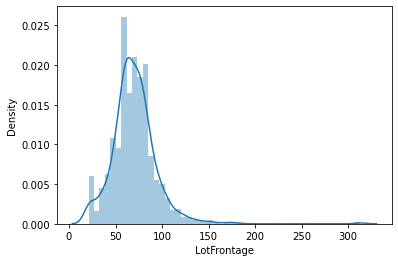

In [20]:
sns.distplot(housing.LotFrontage)
plt.show()

From above plot we can see that the data is right-skewed and as it is numerical so we will impute NULL values with its respective median

In [21]:
housing.LotFrontage.replace(np.nan, housing.LotFrontage.median(), inplace=True)

**GarageYrBlt**: Year garage was built

In [22]:
housing.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
1995.0    18
1964.0    18
1959.0    17
1963.0    16
1990.0    16
1956.0    16
1969.0    15
1979.0    15
1980.0    15
1967.0    15
1988.0    14
1973.0    14
1940.0    14
1920.0    14
1972.0    14
1961.0    13
1971.0    13
1955.0    13
1992.0    13
1953.0    12
1987.0    11
1948.0    11
1985.0    10
1981.0    10
1941.0    10
1925.0    10
1989.0    10
1975.0     9
1991.0     9
1939.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1986.0     6
1951.0     6
1926.0     6
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3

In [23]:
housing.GarageYrBlt.dtypes

dtype('float64')

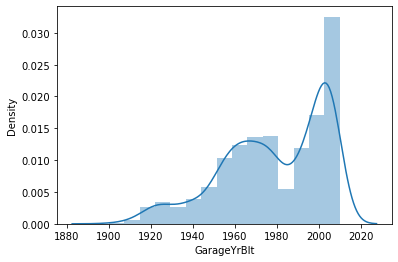

In [24]:
sns.distplot(housing.GarageYrBlt)
plt.show()

From above plot we can see that the data is not normally distributed and as it is numerical so we will impute NULL values with its respective median

In [25]:
housing.GarageYrBlt.replace(np.nan, housing.GarageYrBlt.median(), inplace=True)

**MasVnrType**: Masonry veneer type

In [26]:
housing.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [27]:
housing.MasVnrType.mode()

0    None
dtype: object

From above plot we can see that it is categorical variable so we will impute NULL values with its respective mode or "None" value.

In [28]:
housing['MasVnrType'] = housing['MasVnrType'].fillna(housing['MasVnrType'].mode()[0])

**MasVnrArea**: Masonry veneer area in square feet

In [29]:
housing.MasVnrArea.value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
116.0       3
136.0       3
312.0       3
256.0       3
145.0       3
74.0        3
42.0        3
98.0        2
66.0        2
660.0       2
243.0       2
338.0       2
143.0       2
318.0       2
285.0 

In [30]:
housing.MasVnrArea.dtypes

dtype('float64')

In [31]:
sns.distplot(housing.MasVnrArea)
plt.show()

From above plot we can see that the data is right-skewed and outlier are also there. As it is numerical field so we will impute NULL values with its respective median.

In [32]:
housing.MasVnrArea.replace(np.nan, housing.MasVnrArea.median(), inplace=True)

**Electrical**: Electrical system

In [33]:
housing.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [34]:
housing.Electrical.mode()

0    SBrkr
dtype: object

From above plot we can see that it is categorical variable so we will impute NULL values with its respective mode.

In [35]:
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode()[0])

So now all missing values are imputed. Let's verify once.

In [36]:
#Check null values in sorted values
df_null = pd.DataFrame((round(housing.isnull().sum()/len(housing.index)*100,2).sort_values(ascending=False)),columns=["Percentage of Data"])[housing.isnull().sum() > 0]
df_null

Empty DataFrame
Columns: [Percentage of Data]
Index: []

Based on above all missing values are imputed successfully.

In [37]:
#Check the shape
housing.shape

(1460, 76)

In [38]:
housing.FireplaceQu.value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

**There are four columns which gives us details about the years of the construction as shown below:**

- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)

We will derive a new column HouseAge of building and dropping the other columns. We take the "YearRemodAdd" date because if the house is re-model that means they have made it better so it would not be right to take original date of built

In [39]:
housing['HouseAge'] = housing['YrSold'] - housing['YearRemodAdd']
housing['HouseAge'].head()

0     5
1    31
2     6
3    36
4     8
Name: HouseAge, dtype: int64

In [40]:
#Before dropping
housing.shape

(1460, 77)

In [41]:
#Dropping 'YrSold', 'MoSold','YearBuilt','YearRemodAdd'
house_age_col = ['YrSold', 'MoSold','YearBuilt','YearRemodAdd']
housing = housing.drop(house_age_col, axis=1)

In [42]:
#After dropping
housing.shape

(1460, 73)

**check for columns with more that 85% same values**

In [43]:
non_normalize_cols = {}
for col in housing.columns:
    max_val = max(list(housing[col].value_counts(normalize=True).sort_values(ascending=False).head(1)))
    if max_val >= 0.85:
        non_normalize_cols[col] = round(max_val,2)
        
pd.DataFrame({'Features': list(non_normalize_cols.keys()), 'Percentage': list(non_normalize_cols.values())})

Features  Percentage
0          Street        1.00
1     LandContour        0.90
2       Utilities        1.00
3       LandSlope        0.95
4      Condition1        0.86
5      Condition2        0.99
6        RoofMatl        0.98
7       ExterCond        0.88
8        BsmtCond        0.90
9    BsmtFinType2        0.86
10     BsmtFinSF2        0.89
11        Heating        0.98
12     CentralAir        0.93
13     Electrical        0.91
14   LowQualFinSF        0.98
15   BsmtHalfBath        0.94
16   KitchenAbvGr        0.95
17     Functional        0.93
18     GarageQual        0.90
19     GarageCond        0.91
20     PavedDrive        0.92
21  EnclosedPorch        0.86
22      3SsnPorch        0.98
23    ScreenPorch        0.92
24       PoolArea        1.00
25        MiscVal        0.96
26       SaleType        0.87

`Above data shows that all above columns are not going to play major role in analysis and add any value to our model.`

In [44]:
#Before dropping
housing.shape

(1460, 73)

In [45]:
#Dropping 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType'
housing = housing.drop(non_normalize_cols.keys(), axis=1)

In [46]:
#After dropping
housing.shape

(1460, 46)

## Step 1.2: Treating Outlier:

Let's check and verify to remove outlier really help and we left with enough data for modelling or not.

In [47]:
# Checking outliers at 25%,50%,75%,90%,95% and above

housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count      1460.0      1460.00    1460.00      1460.00      1460.00   
mean         56.9        69.86   10516.83         6.10         5.58   
std          42.3        22.03    9981.26         1.38         1.11   
min          20.0        21.00    1300.00         1.00         1.00   
25%          20.0        60.00    7553.50         5.00         5.00   
50%          50.0        69.00    9478.50         6.00         5.00   
75%          70.0        79.00   11601.50         7.00         6.00   
90%         120.0        92.00   14381.70         8.00         7.00   
95%         160.0       104.00   17401.15         8.00         8.00   
99%         190.0       137.41   37567.64        10.00         9.00   
max         190.0       313.00  215245.00        10.00         9.00   

       MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
count     1460.00     1460.00    1460.00      1460.00   1460.00   1460.00   
mean       103.12      443.64     567.24      1057.43   1162.63    346.99   
std        180.73      456.10     441.87       438.71    386.59    436.53   
min          0.00        0.00       0.00         0.00    334.00      0.00   
25%          0.00        0.00     223.00       795.75    882.00      0.00   
50%          0.00      383.50     477.50       991.50   1087.00      0.00   
75%        164.25      712.25     808.00      1298.25   1391.25    728.00   
90%        335.00     1065.50    1232.00      1602.20   1680.00    954.20   
95%        456.00     1274.00    1468.00      1753.00   1831.25   1141.05   
99%        791.28     1572.41    1797.05      2155.05   2219.46   1418.92   
max       1600.00     5644.00    2336.00      6110.00   4692.00   2065.00   

       GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
count    1460.00       1460.00   1460.00   1460.00       1460.00   
mean     1515.46          0.43      1.57      0.38          2.87   
std       525.48          0.52      0.55      0.50          0.82   
min       334.00          0.00      0.00      0.00          0.00   
25%      1129.50          0.00      1.00      0.00          2.00   
50%      1464.00          0.00      2.00      0.00          3.00   
75%      1776.75          1.00      2.00      1.00          3.00   
90%      2158.30          1.00      2.00      1.00          4.00   
95%      2466.10          1.00      2.00      1.00          4.00   
99%      3123.48          2.00      3.00      1.00          5.00   
max      5642.00          3.00      3.00      2.00          8.00   

       TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
count       1460.00     1460.00      1460.00     1460.00     1460.00   
mean           6.52        0.61      1978.59        1.77      472.98   
std            1.63        0.64        24.00        0.75      213.80   
min            2.00        0.00      1900.00        0.00        0.00   
25%            5.00        0.00      1962.00        1.00      334.50   
50%            6.00        1.00      1980.00        2.00      480.00   
75%            7.00        1.00      2001.00        2.00      576.00   
90%            9.00        1.00      2006.00        3.00      757.10   
95%           10.00        2.00      2007.00        3.00      850.10   
99%           11.00        2.00      2009.00        3.00     1002.79   
max           14.00        3.00      2010.00        4.00     1418.00   

       WoodDeckSF  OpenPorchSF  SalePrice  HouseAge  
count     1460.00      1460.00    1460.00   1460.00  
mean        94.24        46.66  180921.20     22.95  
std        125.34        66.26   79442.50     20.64  
min          0.00         0.00   34900.00     -1.00  
25%          0.00         0.00  129975.00      4.00  
50%          0.00        25.00  163000.00     14.00  
75%        168.00        68.00  214000.00     41.00  
90%        262.00       130.00  278000.00     56.00  
95%        335.00       175.05  326100.00     58.00  
99%    

In [48]:
#If we remove outlier then how much % of data will left. Let's calculate using Inter-Quartile Range below

numerical_cols = housing.select_dtypes(['int64','float64']).columns

housing_out = housing

#Calculate for numerical variables
for k in numerical_cols:
    IQR = housing_out[k].quantile(.75) - housing_out[k].quantile(.25)
    housing_out = housing_out[(housing_out[k] < (housing_out[k].quantile(.75) + 1.5 * IQR)) & (housing_out[k] > (housing_out[k].quantile(.25) - 1.5 * IQR))]

housing_out.shape[0]/housing.shape[0] * 100

58.56164383561644

`Aroung 58.56% data will left if remove outliers so this does not seem a wise option as the same results in significant reduction in our available data for model building.`

Let's plot a distribution graph and try to understand the behaviour of data with and without transformation.

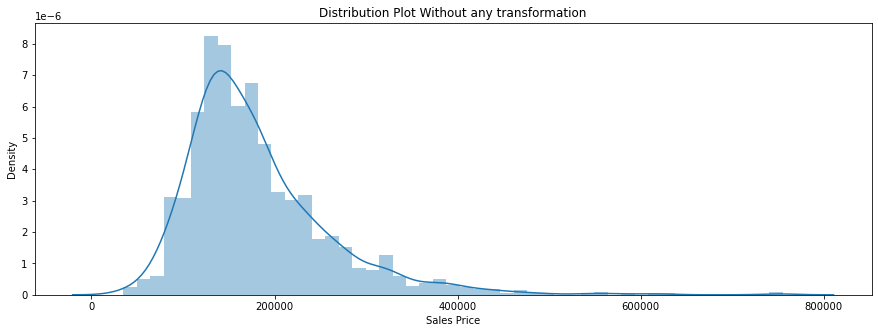

In [49]:
#plotting distribution of 'SalePrice'

plt.figure(figsize=(15,5))
sns.distplot(housing.SalePrice)
plt.xlabel("Sales Price")
plt.title('Distribution Plot Without any transformation')
plt.show()

As above graph clearly shows Right-Skewed so we will tranform the dependent variable by taking LOG and checked whether it will be normally distributed or not.

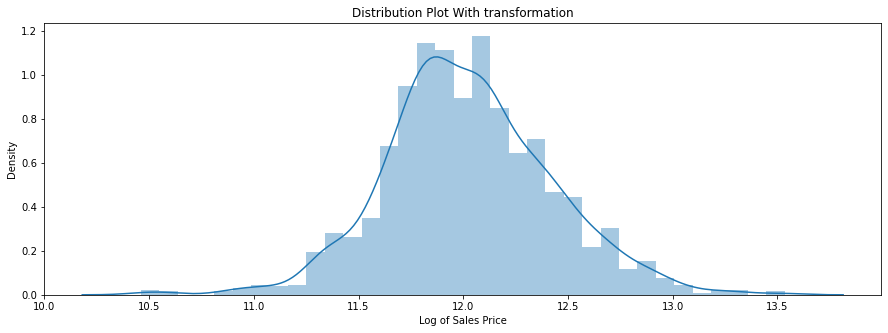

In [50]:
#plotting distribution of 'SalePrice'

plt.figure(figsize=(15,5))
sns.distplot(np.log(housing.SalePrice))
plt.xlabel("Log of Sales Price")
plt.title('Distribution Plot With transformation')
plt.show()

`By applying log transformation on dependent column, we get normal distribution of data from originally right skewed distribution. Hence it is better to transformation on SalePrice column for pure model building.`

In [51]:
housing['SalePrice'] = np.log(housing.SalePrice)

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it.
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable.

We'll visualise our data using `matplotlib` and `seaborn`.

In [52]:
#Let's check the correlation coefficients using HeatMap.
plt.figure(figsize = (20, 12))
sns.heatmap(housing.corr(), annot = True, cmap="RdYlBu")
plt.yticks(rotation=0)
plt.show()

Based on above heat-map below are the highly correlated features
- `TotalBsmtSF` and `1stFlrSF` have 82% correlation
- `TotRmsAbvGrd` and `GrLivArea` have 83% correlation
- `GarageCars` and `GarageArea` have 88% correlation

As both we cannot remove so let’s drop `1stFlrSF`, `TotRmsAbvGrd` and `GarageArea`.

In [53]:
#Dropping '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'
housing.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'], axis=1, inplace=True)

In [54]:
housing.shape

(1460, 43)

#### <font color=maroon>Visualising Numeric Variables</font>

Let's make a **scatter** of all the numeric variables

In [55]:
# Numeric columns
num_cols = list(housing.select_dtypes(['int64', 'float64']))
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'HouseAge']

In [56]:
#let’s plot a graph using scatter plot for all numerical data with target variable 'SalePrice'

plt.figure(figsize=(25,40))
for i, j in enumerate(num_cols):
    plt.subplot(6,4,i+1)
    plt.scatter(housing[j], housing['SalePrice'])
    plt.xlabel(j,fontsize=18)
    plt.title("Sales Price Vs " + j)
plt.show()

#### <font color=maroon>Visualising Categorical Variables</font>

Let's make a boxplot for some of these categorical variables.

In [57]:
categorical_cols = list(housing.select_dtypes('object'))
categorical_cols

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SaleCondition']

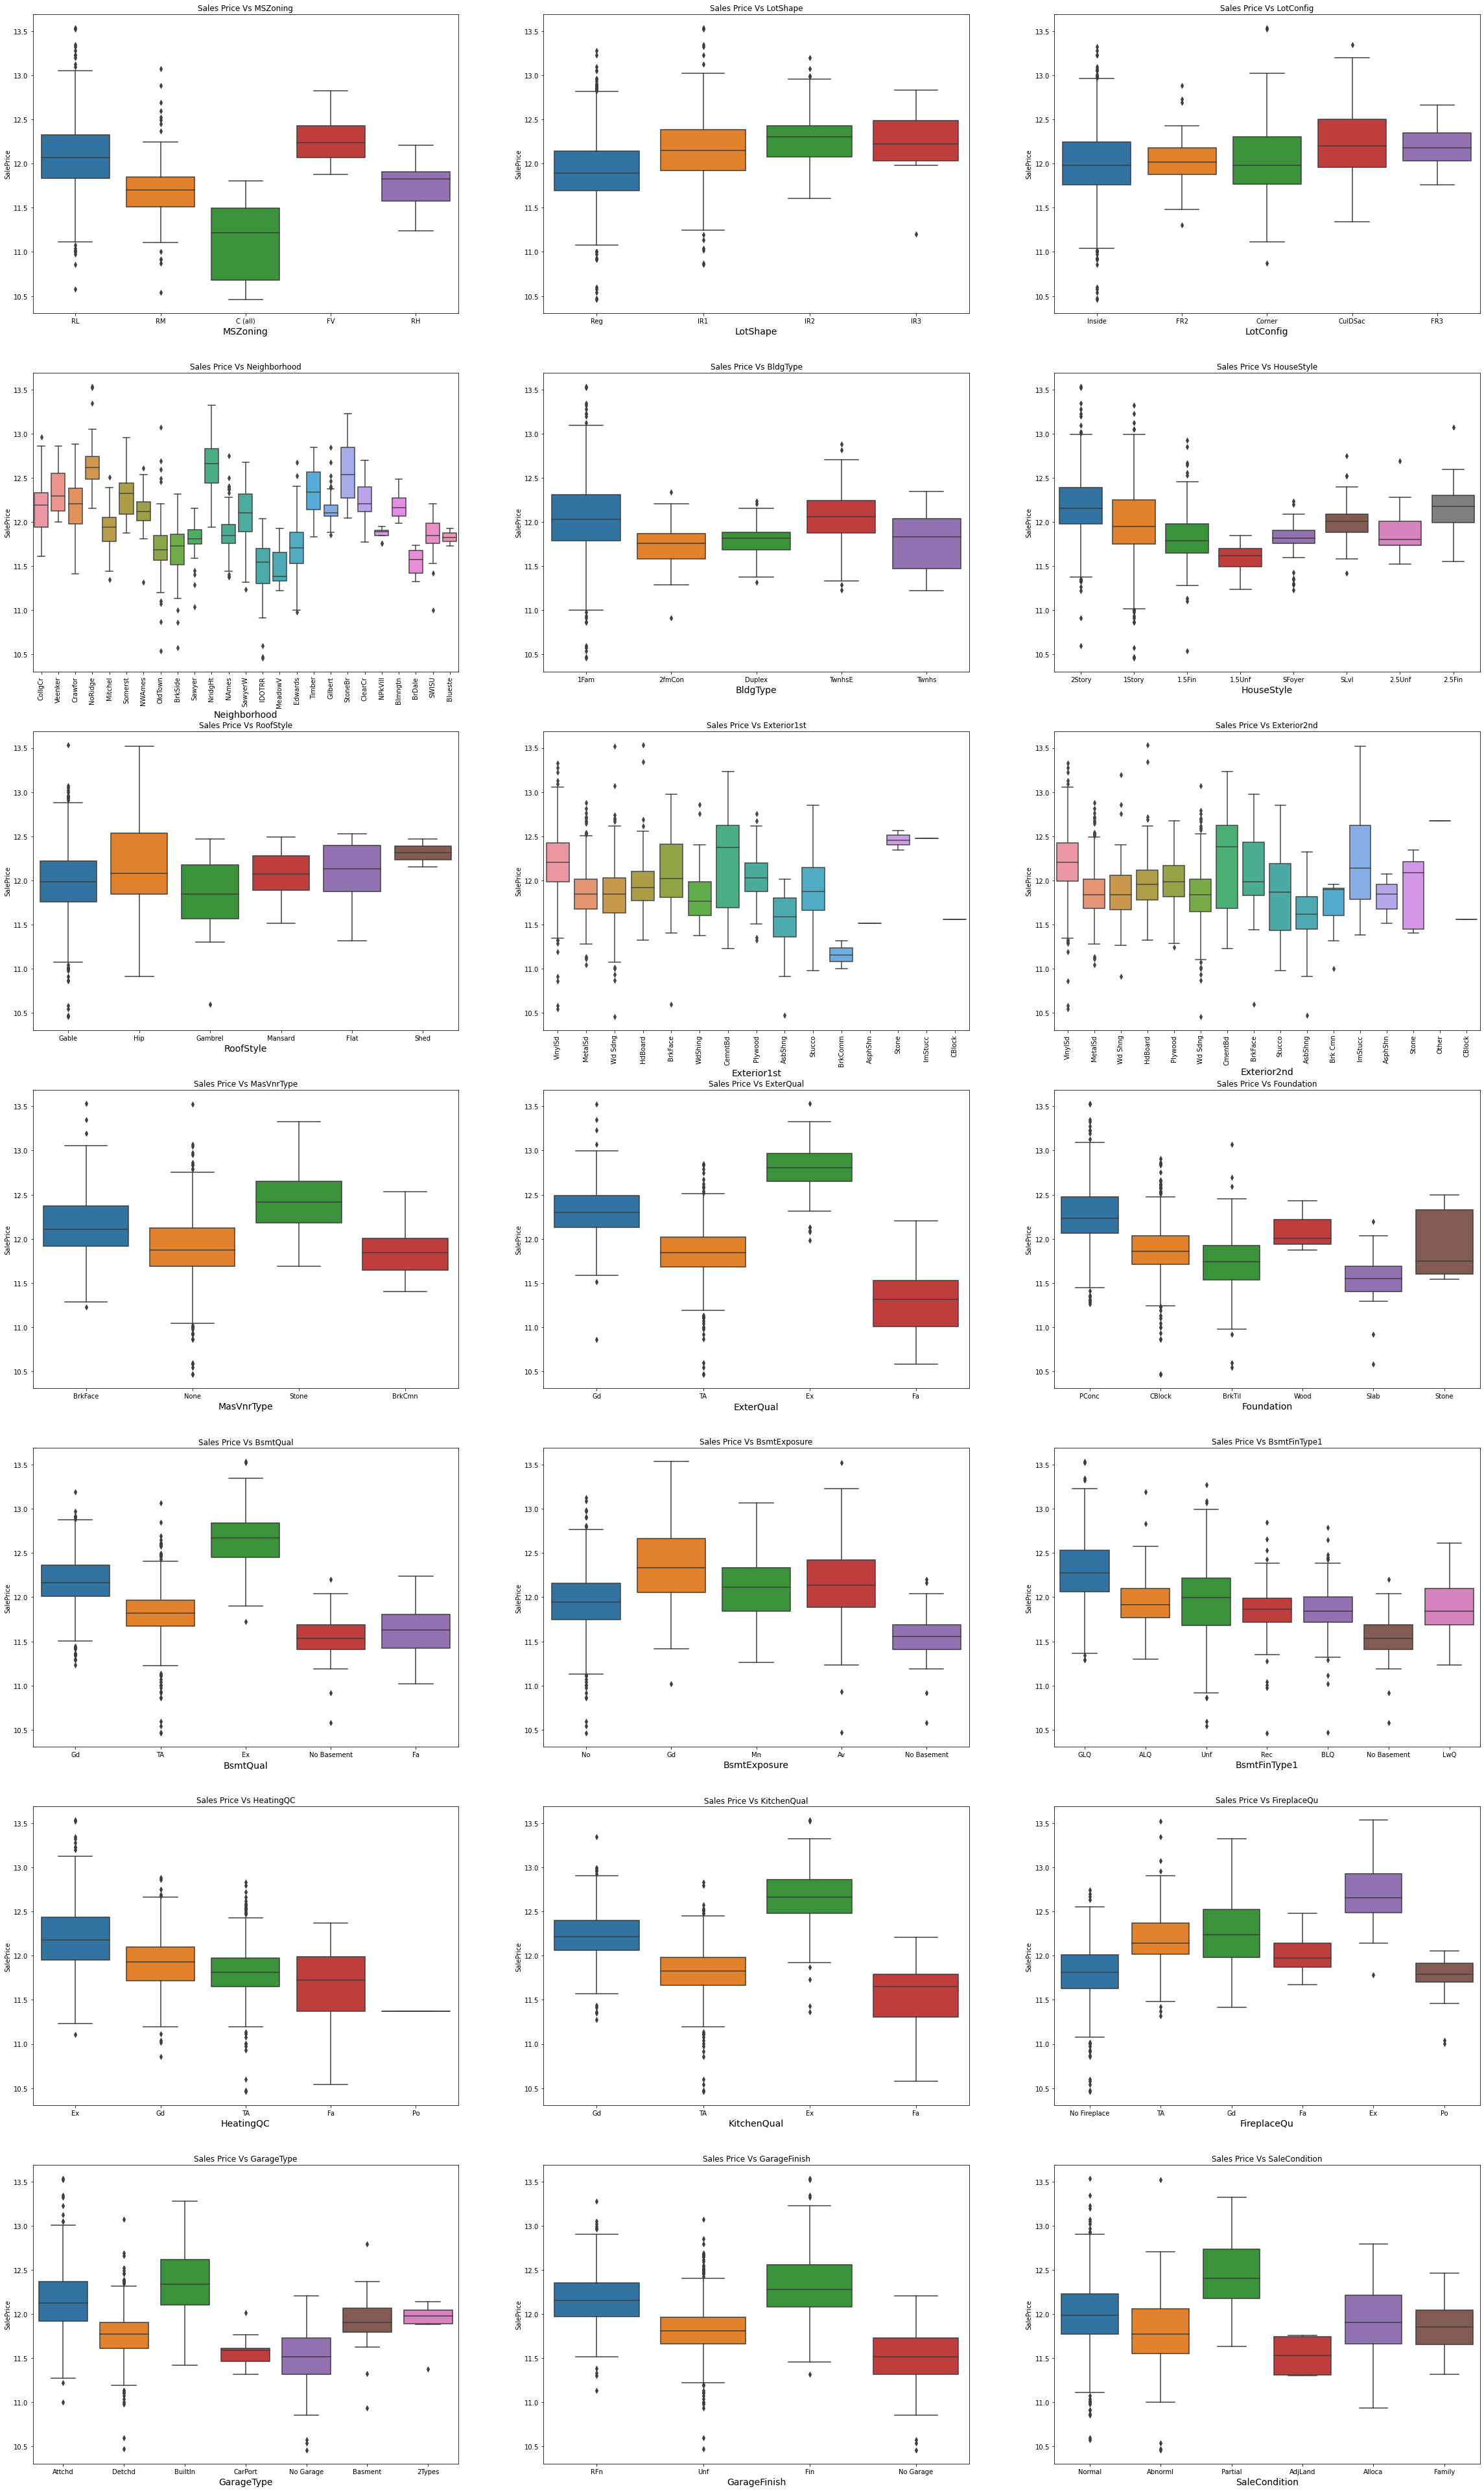

In [58]:
#Avoid repetation code so creating function for displaying box plot
plt.figure(figsize=(40,100))
for i, j in enumerate(categorical_cols):
    plt.subplot(10, 3, (i+1))
    sns.boxplot(x=j, y='SalePrice',data=housing)
    plt.xlabel(j, fontsize=14)
    plt.title("Sales Price Vs " + j)
    if j == "Neighborhood" or j == "Exterior1st" or j == "Exterior2nd":
        plt.xticks(rotation=90)
plt.show()

## Step 3: Data Preparation for Modelling

In [59]:
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story            7            5     Gable     VinylSd   
1     1Fam     1Story            6            8     Gable     MetalSd   
2     1Fam     2Story            7            5     Gable     VinylSd   
3     1Fam     2Story            7            5     Gable     Wd Sdng   
4     1Fam     2Story            8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0           No          GLQ         706        150          856        Ex   
1           Gd          ALQ         978        284         1262        Ex   
2           Mn          GLQ         486        434          920        Ex   
3           No          ALQ         216        540          756        Gd   
4           Av          GLQ         655        490         1145        Ex   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0       854       1710             1         2         1             3   
1         0       1262             0         2         0             3   
2       866       1786             1         2         1             3   
3       756       1717             1         1         0             3   
4      1053       2198             1         2         1             4   

  KitchenQual  Fireplaces   FireplaceQu GarageType  GarageYrBlt GarageFinish  \
0          Gd           0  No Fireplace     Attchd       2003.0          RFn   
1          TA           1            TA     Attchd       1976.0          RFn   
2          Gd           1            TA     Attchd       2001.0          RFn   
3          Gd           1            Gd     Detchd       1998.0          Unf   
4          Gd           1            TA     Attchd       2000.0          RFn   

   GarageCars  WoodDeckSF  OpenPorchSF SaleCondition  SalePrice  HouseAge  
0           2           0           61        Normal      12.25         5  
1           2         298            0        Normal      12.11        31  
2           2           0           42        Normal      12.32         6  
3           3           0           35       Abnorml      11.85        36  
4           3         192           84        Normal      12.43         8

In [60]:
housing.shape

(1460, 43)

- In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s. So let's do it for all columns which is having string values by using `Dummy Variable` concept.
- But before that, it is always better option to convert ordered categorical variable into numeric type rather than converting them into dummies as they add value to our model.

### Step 3.1: Dummy Variables

In [61]:
all_cols = housing.columns
all_cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'SaleCondition', 'SalePrice', 'HouseAge'],
      dtype='object')

**Below are the ordered categorical variables which need to be converted to numerical values:**
- `LotShape`: General shape of property
- `ExterQual`: Evaluates the quality of the material on the exterior 
- `BsmtQual`: Evaluates the height of the basement
- `BsmtExposure`: Refers to walkout or garden level walls
- `BsmtFinType1`: Rating of basement finished area
- `HeatingQC`: Heating quality and condition
- `KitchenQual`: Kitchen quality
- `FireplaceQu`: Fireplace quality
- `GarageFinish`: Interior finish of the garage

In [62]:
print("****************LotShape**************")
print(housing.LotShape.value_counts())
print("\n\n****************ExterQual**************")
print(housing.ExterQual.value_counts())
print("\n\n****************BsmtQual**************")
print(housing.BsmtQual.value_counts())
print("\n\n****************BsmtExposure**************")
print(housing.BsmtExposure.value_counts())
print("\n\n****************BsmtFinType1**************")
print(housing.BsmtFinType1.value_counts())
print("\n\n****************HeatingQC**************")
print(housing.HeatingQC.value_counts())
print("\n\n****************KitchenQual**************")
print(housing.KitchenQual.value_counts())
print("\n\n****************FireplaceQu**************")
print(housing.FireplaceQu.value_counts())
print("\n\n****************GarageFinish**************")
print(housing.GarageFinish.value_counts())

****************LotShape**************
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


****************ExterQual**************
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


****************BsmtQual**************
TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64


****************BsmtExposure**************
No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64


****************BsmtFinType1**************
Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64


****************HeatingQC**************
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


****************KitchenQual**************
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dt

In [63]:
#mapping is based on the data dictionaty for LotShape
housing['LotShape'] = housing['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})

#mapping is based on the data dictionaty for ExterQual
housing['ExterQual'] = housing['ExterQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

#mapping is based on the data dictionaty for BsmtQual
housing['BsmtQual'] = housing['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0})

##mapping is based on  on the data dictionaty for BsmtExposure
housing['BsmtExposure'] = housing['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

##mapping is based on  on the data dictionaty for BsmtFinType1
housing['BsmtFinType1'] = housing['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0})

##mapping is based on  on the data dictionaty
housing['HeatingQC'] = housing['HeatingQC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

##mapping is based on  on the data dictionaty for KitchenQual
housing['KitchenQual'] = housing['KitchenQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

##mapping is based on  on the data dictionaty for FireplaceQu
housing['FireplaceQu'] = housing['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})

##mapping is based on  on the data dictionaty for GarageFinish
housing['GarageFinish'] = housing['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'No Garage':0})

In [64]:
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450         3    Inside      CollgCr   
1          20       RL         80.0     9600         3       FR2      Veenker   
2          60       RL         68.0    11250         2    Inside      CollgCr   
3          70       RL         60.0     9550         2    Corner      Crawfor   
4          60       RL         84.0    14260         2       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story            7            5     Gable     VinylSd   
1     1Fam     1Story            6            8     Gable     MetalSd   
2     1Fam     2Story            7            5     Gable     VinylSd   
3     1Fam     2Story            7            5     Gable     Wd Sdng   
4     1Fam     2Story            8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  \
0     VinylSd    BrkFace       196.0          3      PConc         4   
1     MetalSd       None         0.0          2     CBlock         4   
2     VinylSd    BrkFace       162.0          3      PConc         4   
3     Wd Shng       None         0.0          2     BrkTil         3   
4     VinylSd    BrkFace       350.0          3      PConc         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0             1             6         706        150          856          4   
1             4             5         978        284         1262          4   
2             2             6         486        434          920          4   
3             1             5         216        540          756          3   
4             3             6         655        490         1145          4   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0       854       1710             1         2         1             3   
1         0       1262             0         2         0             3   
2       866       1786             1         2         1             3   
3       756       1717             1         1         0             3   
4      1053       2198             1         2         1             4   

   KitchenQual  Fireplaces  FireplaceQu GarageType  GarageYrBlt  GarageFinish  \
0            3           0            0     Attchd       2003.0             2   
1            2           1            3     Attchd       1976.0             2   
2            3           1            3     Attchd       2001.0             2   
3            3           1            4     Detchd       1998.0             1   
4            3           1            3     Attchd       2000.0             2   

   GarageCars  WoodDeckSF  OpenPorchSF SaleCondition  SalePrice  HouseAge  
0           2           0           61        Normal      12.25         5  
1           2         298            0        Normal      12.11        31  
2           2           0           42        Normal      12.32         6  
3           3           0           35       Abnorml      11.85        36  
4           3         192           84        Normal      12.43         8

In [65]:
housing.describe()

MSSubClass  LotFrontage    LotArea  LotShape  OverallQual  OverallCond  \
count      1460.0      1460.00    1460.00   1460.00      1460.00      1460.00   
mean         56.9        69.86   10516.83      2.59         6.10         5.58   
std          42.3        22.03    9981.26      0.58         1.38         1.11   
min          20.0        21.00    1300.00      0.00         1.00         1.00   
25%          20.0        60.00    7553.50      2.00         5.00         5.00   
50%          50.0        69.00    9478.50      3.00         6.00         5.00   
75%          70.0        79.00   11601.50      3.00         7.00         6.00   
max         190.0       313.00  215245.00      3.00        10.00         9.00   

       MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  \
count     1460.00    1460.00   1460.00       1460.00       1460.00   
mean       103.12       2.40      3.49          1.63          3.55   
std        180.73       0.57      0.88          1.07          2.11   
min          0.00       1.00      0.00          0.00          0.00   
25%          0.00       2.00      3.00          1.00          1.00   
50%          0.00       2.00      4.00          1.00          4.00   
75%        164.25       3.00      4.00          2.00          6.00   
max       1600.00       4.00      5.00          4.00          6.00   

       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  \
count     1460.00    1460.00      1460.00    1460.00   1460.00    1460.00   
mean       443.64     567.24      1057.43       3.15    346.99    1515.46   
std        456.10     441.87       438.71       0.96    436.53     525.48   
min          0.00       0.00         0.00       0.00      0.00     334.00   
25%          0.00     223.00       795.75       2.00      0.00    1129.50   
50%        383.50     477.50       991.50       4.00      0.00    1464.00   
75%        712.25     808.00      1298.25       4.00    728.00    1776.75   
max       5644.00    2336.00      6110.00       4.00   2065.00    5642.00   

       BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
count       1460.00   1460.00   1460.00       1460.00      1460.00   
mean           0.43      1.57      0.38          2.87         2.51   
std            0.52      0.55      0.50          0.82         0.66   
min            0.00      0.00      0.00          0.00         1.00   
25%            0.00      1.00      0.00          2.00         2.00   
50%            0.00      2.00      0.00          3.00         2.00   
75%            1.00      2.00      1.00          3.00         3.00   
max            3.00      3.00      2.00          8.00         4.00   

       Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
count     1460.00      1460.00      1460.00       1460.00     1460.00   
mean         0.61         1.83      1978.59          1.72        1.77   
std          0.64         1.81        24.00          0.89        0.75   
min          0.00         0.00      1900.00          0.00        0.00   
25%          0.00         0.00      1962.00          1.00        1.00   
50%          1.00         2.00      1980.00          2.00        2.00   
75%          1.00         4.00      2001.00          2.00        2.00   
max          3.00         5.00      2010.00          3.00        4.00   

       WoodDeckSF  OpenPorchSF  SalePrice  HouseAge  
count     1460.00      1460.00    1460.00   1460.00  
mean        94.24        46.66      12.02     22.95  
std        125.34        66.26       0.40     20.64  
min          0.00         0.00      10.46     -1.00  
25%          0.00         0.00      11.78      4.00  
50%          0.00        25.00      12.00     14.00  
75%        168.00        68.00      12.27     41.00  
max        857.00       547.00      13.53     60.00

In [66]:
category_cols = housing.select_dtypes('object').columns
category_cols

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'GarageType', 'SaleCondition'],
      dtype='object')

**Handling of un-ordered categorical variables.**

In [67]:
#get dummies for unordered categorical columns.

for k in category_cols:
    dummy_df = pd.get_dummies(housing[k], prefix=k, drop_first=True)   #enabling drop_first
    housing = pd.concat([housing, dummy_df], axis=1)
    housing.drop(k, axis=1, inplace=True)   #Dropping main column name as it is not required after dummy variable creation.

In [68]:
housing.head()

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
0          60         65.0     8450         3            7            5   
1          20         80.0     9600         3            6            8   
2          60         68.0    11250         2            7            5   
3          70         60.0     9550         2            7            5   
4          60         84.0    14260         2            8            5   

   MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0       196.0          3         4             1             6         706   
1         0.0          2         4             4             5         978   
2       162.0          3         4             2             6         486   
3         0.0          2         3             1             5         216   
4       350.0          3         4             3             6         655   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  \
0        150          856          4       854       1710             1   
1        284         1262          4         0       1262             0   
2        434          920          4       866       1786             1   
3        540          756          3       756       1717             1   
4        490         1145          4      1053       2198             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  \
0         2         1             3            3           0            0   
1         2         0             3            2           1            3   
2         2         1             3            3           1            3   
3         1         0             3            3           1            4   
4         2         1             4            3           1            3   

   GarageYrBlt  GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  SalePrice  \
0       2003.0             2           2           0           61      12.25   
1       1976.0             2           2         298            0      12.11   
2       2001.0             2           2           0           42      12.32   
3       1998.0             1           3           0           35      11.85   
4       2000.0             2           3         192           84      12.43   

   HouseAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0         5            0            0            1            0   
1        31            0            0            1            0   
2         6            0            0            1            0   
3        36            0            0            1            0   
4         8            0            0            1            0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   N

Now all data preparation for model is completed. Let's check it's shape and some initial data.

In [69]:
housing.describe()

MSSubClass  LotFrontage    LotArea  LotShape  OverallQual  OverallCond  \
count      1460.0      1460.00    1460.00   1460.00      1460.00      1460.00   
mean         56.9        69.86   10516.83      2.59         6.10         5.58   
std          42.3        22.03    9981.26      0.58         1.38         1.11   
min          20.0        21.00    1300.00      0.00         1.00         1.00   
25%          20.0        60.00    7553.50      2.00         5.00         5.00   
50%          50.0        69.00    9478.50      3.00         6.00         5.00   
75%          70.0        79.00   11601.50      3.00         7.00         6.00   
max         190.0       313.00  215245.00      3.00        10.00         9.00   

       MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  \
count     1460.00    1460.00   1460.00       1460.00       1460.00   
mean       103.12       2.40      3.49          1.63          3.55   
std        180.73       0.57      0.88          1.07          2.11   
min          0.00       1.00      0.00          0.00          0.00   
25%          0.00       2.00      3.00          1.00          1.00   
50%          0.00       2.00      4.00          1.00          4.00   
75%        164.25       3.00      4.00          2.00          6.00   
max       1600.00       4.00      5.00          4.00          6.00   

       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  \
count     1460.00    1460.00      1460.00    1460.00   1460.00    1460.00   
mean       443.64     567.24      1057.43       3.15    346.99    1515.46   
std        456.10     441.87       438.71       0.96    436.53     525.48   
min          0.00       0.00         0.00       0.00      0.00     334.00   
25%          0.00     223.00       795.75       2.00      0.00    1129.50   
50%        383.50     477.50       991.50       4.00      0.00    1464.00   
75%        712.25     808.00      1298.25       4.00    728.00    1776.75   
max       5644.00    2336.00      6110.00       4.00   2065.00    5642.00   

       BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
count       1460.00   1460.00   1460.00       1460.00      1460.00   
mean           0.43      1.57      0.38          2.87         2.51   
std            0.52      0.55      0.50          0.82         0.66   
min            0.00      0.00      0.00          0.00         1.00   
25%            0.00      1.00      0.00          2.00         2.00   
50%            0.00      2.00      0.00          3.00         2.00   
75%            1.00      2.00      1.00          3.00         3.00   
max            3.00      3.00      2.00          8.00         4.00   

       Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
count     1460.00      1460.00      1460.00       1460.00     1460.00   
mean         0.61         1.83      1978.59          1.72        1.77   
std          0.64         1.81        24.00          0.89        0.75   
min          0.00         0.00      1900.00          0.00        0.00   
25%          0.00         0.00      1962.00          1.00        1.00   
50%          1.00         2.00      1980.00          2.00        2.00   
75%          1.00         4.00      2001.00          2.00        2.00   
max          3.00         5.00      2010.00          3.00        4.00   

       WoodDeckSF  OpenPorchSF  SalePrice  HouseAge  MSZoning_FV  MSZoning_RH  \
count     1460.00      1460.00    1460.00   1460.00      1460.00      1460.00   
mean        94.24        46.66      12.02     22.95         0.04         0.01   
std        125.34        66.26       0.40     20.64         0.21         0.10   
min          0.00         0.00      10.46     -1.00         0.00         0.00   
25%          0.00         0.00      11.78      4.00         0.00         0.00   
50%          0.00        25.00      12.00     14.00         0.00         0.00   
75%        168.00        68.00      12.27     41.00         0.00         0.00   
max        857.

In [70]:
housing.shape

(1460, 127)

### Step 3.2: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [71]:
# We specify this so that the train and test data set always have the same rows, respectively. Split it in 70-30 proportion.
np.random.seed(0)
housing_train, housing_test = train_test_split(housing, train_size = 0.7, random_state = 100)

In [72]:
#Let's check train set which should be 80% of main dataset i.e. approx 70% of 1460 = 1021
housing_train.shape

(1021, 127)

In [73]:
housing_train.describe()

MSSubClass  LotFrontage    LotArea  LotShape  OverallQual  OverallCond  \
count     1021.00      1021.00    1021.00   1021.00      1021.00      1021.00   
mean        58.47        69.57   10489.96      2.59         6.09         5.58   
std         43.30        22.09   10308.06      0.60         1.40         1.09   
min         20.00        21.00    1477.00      0.00         1.00         1.00   
25%         20.00        60.00    7449.00      2.00         5.00         5.00   
50%         50.00        69.00    9505.00      3.00         6.00         5.00   
75%         70.00        78.00   11512.00      3.00         7.00         6.00   
max        190.00       313.00  215245.00      3.00        10.00         9.00   

       MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  \
count     1021.00    1021.00   1021.00       1021.00       1021.00   
mean       104.49       2.40      3.48          1.66          3.59   
std        187.34       0.57      0.90          1.09          2.11   
min          0.00       1.00      0.00          0.00          0.00   
25%          0.00       2.00      3.00          1.00          1.00   
50%          0.00       2.00      4.00          1.00          4.00   
75%        158.00       3.00      4.00          3.00          6.00   
max       1600.00       4.00      5.00          4.00          6.00   

       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  \
count     1021.00    1021.00       1021.0    1021.00   1021.00    1021.00   
mean       448.17     563.75       1062.0       3.15    343.54    1518.15   
std        465.12     448.74        459.1       0.97    435.50     531.85   
min          0.00       0.00          0.0       0.00      0.00     438.00   
25%          0.00     216.00        793.0       2.00      0.00    1135.00   
50%        392.00     462.00        994.0       4.00      0.00    1466.00   
75%        712.00     806.00       1314.0       4.00    728.00    1774.00   
max       5644.00    2336.00       6110.0       4.00   2065.00    5642.00   

       BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
count       1021.00   1021.00   1021.00       1021.00      1021.00   
mean           0.44      1.57      0.38          2.86         2.51   
std            0.53      0.55      0.50          0.82         0.66   
min            0.00      0.00      0.00          0.00         1.00   
25%            0.00      1.00      0.00          2.00         2.00   
50%            0.00      2.00      0.00          3.00         2.00   
75%            1.00      2.00      1.00          3.00         3.00   
max            3.00      3.00      2.00          8.00         4.00   

       Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
count     1021.00      1021.00      1021.00       1021.00     1021.00   
mean         0.60         1.80      1978.86          1.71        1.77   
std          0.65         1.83        23.95          0.90        0.75   
min          0.00         0.00      1900.00          0.00        0.00   
25%          0.00         0.00      1963.00          1.00        1.00   
50%          1.00         2.00      1980.00          2.00        2.00   
75%          1.00         4.00      2001.00          2.00        2.00   
max          3.00         5.00      2010.00          3.00        4.00   

       WoodDeckSF  OpenPorchSF  SalePrice  HouseAge  MSZoning_FV  MSZoning_RH  \
count     1021.00      1021.00    1021.00   1021.00      1021.00      1021.00   
mean        92.64        47.04      12.02     22.83         0.04         0.01   
std        124.48        66.20       0.40     20.59         0.21         0.11   
min          0.00         0.00      10.46     -1.00         0.00         0.00   
25%          0.00         0.00      11.77      4.00         0.00         0.00   
50%          0.00        26.00      11.99     14.00         0.00         0.00   
75%        168.00        70.00      12.28     41.00         0.00         0.00   
max        857.

In [74]:
#Let's check test set which should be 20% of main dataset i.e. around 30% of 1460 = 439
housing_test.shape

(439, 127)

### Step 3.3: Rescaling the Features 

Scaling doesn't impact our model. So here we can see that only those columns are having small integer or binary values for which dummy variable is created. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might create problem at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As we know, there are two common ways of rescaling:

1. Min-Max scaling (normalisation)
2. Standardisation (mean-0, sigma-1) 

So in our case we will be using Min-Max scaling.

Min-Max Scaling (normalisation)

normalisation: $\frac{x - x_{max}}{x_{max} -x_{min}}$

In [75]:
#Creating MinMaxScaler instance
scaler = MinMaxScaler()

#### fit() : This used to learn $(x_{min}, x_{max})$
#### transform() : This used to compute $\frac{x - x_{min}}{x_{max} - x_{min}}$
#### fit_transform() : This do both above together learn $(x_{min}, x_{max})$ and compute ($\frac{x - x_{min}}{x_{max} - x_{min}}$)

In [76]:
# Apply scaler() to all the columns except the '0 or 1' and 'dummy' variables
num_vars = housing_train.select_dtypes(include=['int64','float64']).columns

#Fit and Transform Train Data
housing_train[num_vars] = scaler.fit_transform(housing_train[num_vars])

#Transform Test Data
housing_test[num_vars] = scaler.transform(housing_test[num_vars])

In [77]:
housing_train.head()

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
318         0.24         0.24     0.04       1.0         0.67         0.50   
239         0.18         0.11     0.03       1.0         0.56         0.38   
986         0.18         0.13     0.02       1.0         0.56         0.88   
1416        1.00         0.13     0.05       1.0         0.33         0.62   
390         0.18         0.10     0.03       1.0         0.44         0.88   

      MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
318         0.16       0.67       0.8          1.00          1.00        0.17   
239         0.00       0.33       0.6          0.25          0.33        0.02   
986         0.00       0.33       0.6          0.25          0.17        0.00   
1416        0.00       0.33       0.6          0.25          0.17        0.00   
390         0.00       0.33       0.6          0.25          0.50        0.04   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  \
318        0.15         0.22       1.00      0.62       0.42          0.33   
239        0.27         0.12       0.50      0.33       0.20          0.00   
986        0.21         0.08       0.75      0.31       0.23          0.00   
1416       0.33         0.13       0.75      0.51       0.36          0.00   
390        0.10         0.14       1.00      0.20       0.18          0.33   

      FullBath  HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  \
318       0.67       0.5          0.50         0.67        0.33          0.6   
239       0.33       0.5          0.38         0.33        0.33          0.8   
986       0.33       0.0          0.25         0.67        0.00          0.0   
1416      0.67       0.0          0.50         0.33        0.00          0.0   
390       0.33       0.0          0.50         0.33        0.00          0.0   

      GarageYrBlt  GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  \
318          0.85          0.67        0.75        0.40         0.11   
239          0.45          0.33        0.25        0.00         0.27   
986          0.45          0.33        0.25        0.46         0.00   
1416         0.65          0.33        0.50        0.00         0.00   
390          0.71          0.33        0.25        0.00         0.25   

      SalePrice  HouseAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
318        0.65      0.28            0            0            1            0   
239        0.38      1.00            0            0            1            0   
986        0.39      0.07            0            0            0            1   
1416       0.41      1.00            0            0            0            1   
390        0.40      0.97            0            0            1            0   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
318                   0              0              0                 1   
239                   0              0              0                 1   
986                   0              0              0                 0   
1416                  0              0              0                 1   
390                   0              0              0                 1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
318                      0                    0                     0   
239                      0                    0                     0   
986                      0                    0                     0   
1416                     0                    0                     0   
390                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
318                      0                     0                     0   
239                      0                     0                     0   
986                      0                     0                    

In [78]:
housing_train.describe()

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
count     1021.00      1021.00  1021.00   1021.00      1021.00      1021.00   
mean         0.23         0.17     0.04      0.86         0.57         0.57   
std          0.25         0.08     0.05      0.20         0.16         0.14   
min          0.00         0.00     0.00      0.00         0.00         0.00   
25%          0.00         0.13     0.03      0.67         0.44         0.50   
50%          0.18         0.16     0.04      1.00         0.56         0.50   
75%          0.29         0.20     0.05      1.00         0.67         0.62   
max          1.00         1.00     1.00      1.00         1.00         1.00   

       MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  \
count     1021.00    1021.00   1021.00       1021.00       1021.00   
mean         0.07       0.47      0.70          0.42          0.60   
std          0.12       0.19      0.18          0.27          0.35   
min          0.00       0.00      0.00          0.00          0.00   
25%          0.00       0.33      0.60          0.25          0.17   
50%          0.00       0.33      0.80          0.25          0.67   
75%          0.10       0.67      0.80          0.75          1.00   
max          1.00       1.00      1.00          1.00          1.00   

       BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  \
count     1021.00    1021.00      1021.00    1021.00   1021.00    1021.00   
mean         0.08       0.24         0.17       0.79      0.17       0.21   
std          0.08       0.19         0.08       0.24      0.21       0.10   
min          0.00       0.00         0.00       0.00      0.00       0.00   
25%          0.00       0.09         0.13       0.50      0.00       0.13   
50%          0.07       0.20         0.16       1.00      0.00       0.20   
75%          0.13       0.35         0.22       1.00      0.35       0.26   
max          1.00       1.00         1.00       1.00      1.00       1.00   

       BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
count       1021.00   1021.00   1021.00       1021.00      1021.00   
mean           0.15      0.52      0.19          0.36         0.50   
std            0.18      0.18      0.25          0.10         0.22   
min            0.00      0.00      0.00          0.00         0.00   
25%            0.00      0.33      0.00          0.25         0.33   
50%            0.00      0.67      0.00          0.38         0.33   
75%            0.33      0.67      0.50          0.38         0.67   
max            1.00      1.00      1.00          1.00         1.00   

       Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
count     1021.00      1021.00      1021.00       1021.00     1021.00   
mean         0.20         0.36         0.72          0.57        0.44   
std          0.22         0.37         0.22          0.30        0.19   
min          0.00         0.00         0.00          0.00        0.00   
25%          0.00         0.00         0.57          0.33        0.25   
50%          0.33         0.40         0.73          0.67        0.50   
75%          0.33         0.80         0.92          0.67        0.50   
max          1.00         1.00         1.00          1.00        1.00   

       WoodDeckSF  OpenPorchSF  SalePrice  HouseAge  MSZoning_FV  MSZoning_RH  \
count     1021.00      1021.00    1021.00   1021.00      1021.00      1021.00   
mean         0.11         0.09       0.51      0.39         0.04         0.01   
std          0.15         0.13       0.13      0.34         0.21         0.11   
min          0.00         0.00       0.00      0.00         0.00         0.00   
25%          0.00         0.00       0.43      0.08         0.00         0.00   
50%          0.00         0.05       0.50      0.25         0.00         0.00   
75%          0.20         0.13       0.59      0.69         0.00         0.00   
max          1.00         1.00   

`After Min-Max Scaling all columns values lies between same unit i.e Mininum value as "0" and Maximum value as "1"`

In [79]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling and dummy variable.

plt.figure(figsize = (30, 20))
sns.heatmap(housing_train.corr(), annot = True, cmap="RdYlBu")
plt.show()

Based on above, it is very difficult to find the best features out of 127. So we will use RFE to get the best 50 features out of 127 and use the those features for further analysis.

As we know that our target variable is `SalePrice` so will consider all columns as `X_train` data set except "SalePrice" column.

### Step 3.4: Dividing into X and Y sets for the model building

In [80]:
#Get X and y for Train data
y_train = housing_train.pop('SalePrice')
X_train = housing_train

#Get X and y for Test Data
y_test = housing_test.pop('SalePrice')
X_test = housing_test

In [81]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1021, 126)
X_test shape:  (439, 126)
y_train shape:  (1021,)
y_test shape:  (439,)


In [82]:
X_train.head()

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
318         0.24         0.24     0.04       1.0         0.67         0.50   
239         0.18         0.11     0.03       1.0         0.56         0.38   
986         0.18         0.13     0.02       1.0         0.56         0.88   
1416        1.00         0.13     0.05       1.0         0.33         0.62   
390         0.18         0.10     0.03       1.0         0.44         0.88   

      MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
318         0.16       0.67       0.8          1.00          1.00        0.17   
239         0.00       0.33       0.6          0.25          0.33        0.02   
986         0.00       0.33       0.6          0.25          0.17        0.00   
1416        0.00       0.33       0.6          0.25          0.17        0.00   
390         0.00       0.33       0.6          0.25          0.50        0.04   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  \
318        0.15         0.22       1.00      0.62       0.42          0.33   
239        0.27         0.12       0.50      0.33       0.20          0.00   
986        0.21         0.08       0.75      0.31       0.23          0.00   
1416       0.33         0.13       0.75      0.51       0.36          0.00   
390        0.10         0.14       1.00      0.20       0.18          0.33   

      FullBath  HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  \
318       0.67       0.5          0.50         0.67        0.33          0.6   
239       0.33       0.5          0.38         0.33        0.33          0.8   
986       0.33       0.0          0.25         0.67        0.00          0.0   
1416      0.67       0.0          0.50         0.33        0.00          0.0   
390       0.33       0.0          0.50         0.33        0.00          0.0   

      GarageYrBlt  GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  \
318          0.85          0.67        0.75        0.40         0.11   
239          0.45          0.33        0.25        0.00         0.27   
986          0.45          0.33        0.25        0.46         0.00   
1416         0.65          0.33        0.50        0.00         0.00   
390          0.71          0.33        0.25        0.00         0.25   

      HouseAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
318       0.28            0            0            1            0   
239       1.00            0            0            1            0   
986       0.07            0            0            0            1   
1416      1.00            0            0            0            1   
390       0.97            0            0            1            0   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
318                   0              0              0                 1   
239                   0              0              0                 1   
986                   0              0              0                 0   
1416                  0              0              0                 1   
390                   0              0              0                 1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
318                      0                    0                     0   
239                      0                    0                     0   
986                      0                    0                     0   
1416                     0                    0                     0   
390                      0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
318                      0                     0                     0   
239                      0                     0                     0   
986                      0                     0                     0   
1416                     0                     0            

In [83]:
y_train.head()

318     0.65
239     0.38
986     0.39
1416    0.41
390     0.40
Name: SalePrice, dtype: float64

## Step 4: Model Building and Evaluation

We are going for an **automated process** of selecting a variable and predicting model. So for that to fit a regression line through the training data we are going to use `LinearRegression function from SciKit Learn` as it is compatibile with `Recursive Feature Elimination (RFE)`.

Also to avoid adding columns one by one which may end up as tedious so we will using RFE approach.

### Step 4.1: Recursive Feature Elimination (RFE)

In [84]:
#Creating an object of linear Regression
housing_lm = LinearRegression()

In [85]:
#Fitting a model
housing_lm.fit(X_train,y_train)

#So we will be eliminating columns using RFE in a set of 50 features. 

housing_rfe = RFE(housing_lm, 50)

housing_rfe = housing_rfe.fit(X_train,y_train)

In [86]:
#Display columns selected by RFE and their weights.
df_temp = pd.DataFrame(list(zip(X_train.columns, housing_rfe.support_,housing_rfe.ranking_)), columns=['Feature', 'RFE_Support', 'RFE_Ranking']).sort_values(by='RFE_Ranking')
df_temp = df_temp.loc[df_temp['RFE_Ranking'] == 1]
df_temp.reset_index(drop=True, inplace=True)
df_temp

Feature  RFE_Support  RFE_Ranking
0             MSSubClass         True            1
1               HouseAge         True            1
2            MSZoning_FV         True            1
3            MSZoning_RH         True            1
4            MSZoning_RL         True            1
5            MSZoning_RM         True            1
6    Exterior2nd_CmentBd         True            1
7     Exterior2nd_CBlock         True            1
8          LotConfig_FR3         True            1
9    Exterior1st_CemntBd         True            1
10    Exterior1st_CBlock         True            1
11   Exterior1st_BrkFace         True            1
12  Neighborhood_ClearCr         True            1
13   Exterior1st_BrkComm         True            1
14  Neighborhood_Crawfor         True            1
15  Neighborhood_Edwards         True            1
16   Exterior1st_AsphShn         True            1
17        BldgType_Twnhs         True            1
18  Neighborhood_MeadowV         True            1
19  Neighborhood_Veenker         True            1
20  Neighborhood_StoneBr         True            1
21  Neighborhood_Somerst         True            1
22  Neighborhood_NridgHt         True            1
23          GarageFinish         True            1
24            GarageCars         True            1
25           FireplaceQu         True            1
26           LotFrontage         True            1
27               LotArea         True            1
28       Foundation_Wood         True            1
29           OverallQual         True            1
30           OverallCond         True            1
31      Foundation_Stone         True            1
32       Foundation_Slab         True            1
33              BsmtQual         True            1
34          BsmtExposure         True            1
35          BsmtFinType1         True            1
36            BsmtFinSF1         True            1
37      Foundation_PConc         True            1
38           TotalBsmtSF         True            1
39             HeatingQC         True            1
40     Foundation_CBlock         True            1
41             GrLivArea         True            1
42          BsmtFullBath         True            1
43              FullBath         True            1
44              HalfBath         True            1
45          BedroomAbvGr         True            1
46           KitchenQual         True            1
47   Exterior2nd_Wd Shng         True            1
48    Exterior2nd_Stucco         True            1
49  Neighborhood_NoRidge         True            1

### Building model without Regularization

In [87]:
selected_col = X_train.columns[housing_rfe.support_]
selected_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF',
       'HeatingQC', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'HouseAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_Twnhs',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundatio

`So now we have a list of variable or features on which we need to build a model. Let's create new dataframe and use that for creating model and test.`

In [88]:
X_train_new = X_train[selected_col]
X_test_new = X_test[selected_col]
print("X_train_new shape with 50 features: ", X_train_new.shape)
print("X_test_new shape with 50 features: ", X_test_new.shape)
print("y_train shape with 50 features: ", y_train.shape)
print("y_test shape with 50 features: ", y_test.shape)

X_train_new shape with 50 features:  (1021, 50)
X_test_new shape with 50 features:  (439, 50)
y_train shape with 50 features:  (1021,)
y_test shape with 50 features:  (439,)


In [89]:
#Let's fit new Train and find R2 score for them.

housing_lm.fit(X_train_new, y_train)

LinearRegression()

In [90]:
#Let's display coefficient and intercept.
print(housing_lm.intercept_)
print(housing_lm.coef_)

-0.052012716553777816
[-0.04457958 -0.0828149   0.11669832  0.17553541  0.08276989  0.04953295
  0.03175212  0.02662462 -0.03183895  0.06763786  0.02087747  0.29697194
  0.05018939  0.04456447  0.01946469  0.04915355  0.02087689  0.02848695
  0.02305969  0.07565633 -0.02364532  0.13817015  0.1496788   0.14817146
  0.12230683 -0.02108039  0.0381252   0.052217   -0.02287149 -0.02691884
  0.04249046  0.05222136  0.04137417  0.04401301  0.03288154 -0.02275723
  0.03267177 -0.07714461  0.02410045 -0.02120423 -0.0287655  -0.02120423
  0.03423329 -0.03287053 -0.02741029  0.02235985  0.02511735  0.05480898
  0.05492196  0.04619941]


In [91]:
#Creating a function which will print R2 Score, RSS, MSE and RMSE for both Train and Test Data
def calculate_metric(y_train, y_train_pred, y_test, y_test_pred):
    
    metric = []

    r2_train_lr = r2_score(y_train, y_train_pred)
    print('Train R2 score: ', r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_test_pred)
    print('Test R2 score: ', r2_test_lr)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_train_pred))
    print('Train RSS score: ', rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_test_pred))
    print('Test RSS score: ', rss2_lr)
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_train_pred)
    print('Train MSE score: ', mse_train_lr)
    metric.append(mse_train_lr)

    mse_test_lr = mean_squared_error(y_test, y_test_pred)
    print('Test MSE score: ', mse_test_lr)
    metric.append(mse_test_lr)

    rmse_train_lr = mse_train_lr**0.5
    print('Train RMSE score: ', rmse_train_lr)
    metric.append(rmse_train_lr)

    rmse_test_lr = mse_test_lr**0.5
    print('Test RMSE score: ', rmse_test_lr)
    metric.append(rmse_test_lr)
    
    return metric

In [92]:
y_train_pred = housing_lm.predict(X_train_new)
y_test_pred = housing_lm.predict(X_test_new)

print("****************Data without Regularization********************")
metric1 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)
print("***************************************************************")

****************Data without Regularization********************
Train R2 score:  0.9031103579092224
Test R2 score:  0.8801114536665299
Train RSS score:  1.644859981857681
Test RSS score:  0.91783662972695
Train MSE score:  0.0016110283857567885
Test MSE score:  0.002090744031268679
Train RMSE score:  0.04013761808773396
Test RMSE score:  0.04572465452322936
***************************************************************


## Ridge and Lasso Regression

Let's now try predicting Sale Price on a dataset used in simple linear regression above, to perform ridge and lasso regression.

### Step 4.2: Regularization using Ridge Regression

**Regularization** is the process of deliberately simplifying models to achieve the correct balance between keeping the model simple and not too naive.

Performing Cross score validation and using different values of alpha and finding the optimal paramater.

In [93]:
# list of alphas to tune - if value too high it will lead to underfitting.
# if it is too low, it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [94]:
# Printing the best hyperparameter alpha
print("Ridge Best param: ", ridge_model_cv.best_params_)
print("Ridge Best Score: ", ridge_model_cv.best_score_)
print("Ridge Best estimator: ", ridge_model_cv.best_estimator_)
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

Ridge Best param:  {'alpha': 2.0}
Ridge Best Score:  0.8763024186072735
Ridge Best estimator:  Ridge(alpha=2.0)


param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001              0.91             0.87               20
1        0.001              0.91             0.87               19
2         0.01              0.91             0.87               17
3         0.05              0.91             0.87               16
4          0.1              0.91             0.87               15
5          0.2              0.91             0.87               13
6          0.3              0.91             0.87               11
7          0.4              0.91             0.87               10
8          0.5              0.90             0.87                9
9          0.6              0.90             0.87                7
10         0.7              0.90             0.87                6
11         0.8              0.90             0.88                5
12         0.9              0.90             0.88                4
13           1              0.90             0.88                2
14           2              0.90             0.88                1
15           3              0.89             0.88                3
16           4              0.89             0.87                8
17           5              0.89             0.87               12
18           6              0.89             0.87               14
19           7              0.88             0.87               18
20           8              0.88             0.87               21
21           9              0.88             0.87               22
22          10              0.88             0.86               23
23          20              0.85             0.85               24
24          50              0.81             0.80               25
25         100              0.76             0.75               26
26         500              0.52             0.52               27
27        1000              0.37             0.37               28

**Let's visualize above data.**

In [95]:
# plotting mean test and train scores with alpha 

# Converting the 'param_alpha' datatype from object to int
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# Plotting R2 Score of Train score
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])

# Plotting R2 Score of Test score
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])

plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("RR2 Score Vs Alpha using Ridge Regression")
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.xscale('log')
plt.show()

**<font color="green">Based on above data for Ridge Regression best Alpha Value is "2" for processing.</font>**

In [96]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[-0.03620464 -0.02673861  0.06330218  0.1666576   0.07982321  0.04372597
  0.03239045  0.02203856  0.00609086  0.06712005  0.02096672  0.18657306
  0.04618957  0.06703803  0.03079774  0.06637778  0.0315068   0.03497244
  0.02387568  0.07716894 -0.02670416  0.05645309  0.06891644  0.07410029
  0.04790586 -0.01393279  0.04154455  0.05038791 -0.0225347  -0.02529244
  0.04717587  0.0472315   0.04123117  0.03942791  0.02813093 -0.02116483
  0.01040985 -0.03432562  0.02582826 -0.00922933 -0.00763488 -0.00922933
  0.01485749 -0.02456133 -0.02427594  0.01579077  0.01952723  0.03831056
  0.03136004  0.02377592]


In [97]:
y_train_pred = ridge.predict(X_train_new)
y_test_pred = ridge.predict(X_test_new)

print("****************Data after Ridge Regression********************")
metric2 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)
print("***************************************************************")

****************Data after Ridge Regression********************
Train R2 score:  0.8974012547014626
Test R2 score:  0.8767095830423339
Train RSS score:  1.7417813368766337
Test RSS score:  0.943880497669049
Train MSE score:  0.0017059562555109048
Test MSE score:  0.0021500694707723214
Train RMSE score:  0.041303223306552055
Test RMSE score:  0.046368841594030805
***************************************************************


**<font color="maroon">We have a good train score 89.74% and good test score as well 87.67%. That means what the model learnt in the train set it performed well in the test set.</font>**

In [98]:
#Top 10 feature of Ridge Regression

ridge_param_df = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient':ridge.coef_})
(ridge_param_df.sort_values('Coeficient', ascending=False)).head(10)

Features  Coeficient
11     GrLivArea        0.19
3    OverallQual        0.17
4    OverallCond        0.08
19    GarageCars        0.08
23   MSZoning_RL        0.07
22   MSZoning_RH        0.07
9    TotalBsmtSF        0.07
13      FullBath        0.07
15  BedroomAbvGr        0.07
2        LotArea        0.06

### Step 4.3: Regularization using Lasso Regression

Performing Cross score validation and using different values of alpha and finding the optimal paramater.

In [99]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [100]:
# Printing the best hyperparameter alpha
print("Lasso Best param: ", lasso_model_cv.best_params_)
print("Lasso Best Score: ", lasso_model_cv.best_score_)
print("Lasso Best estimator: ", lasso_model_cv.best_estimator_)
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

Lasso Best param:  {'alpha': 0.0001}
Lasso Best Score:  0.8704468283891875
Lasso Best estimator:  Lasso(alpha=0.0001)


param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001              0.90         8.70e-01                1
1        0.001              0.86         8.49e-01                2
2         0.01              0.53         5.25e-01                3
3         0.05              0.00        -6.87e-03                4
4          0.1              0.00        -6.87e-03                4
5          0.2              0.00        -6.87e-03                4
6          0.3              0.00        -6.87e-03                4
7          0.4              0.00        -6.87e-03                4
8          0.5              0.00        -6.87e-03                4
9          0.6              0.00        -6.87e-03                4
10         0.7              0.00        -6.87e-03                4
11         0.8              0.00        -6.87e-03                4
12         0.9              0.00        -6.87e-03                4
13           1              0.00        -6.87e-03                4
14           2              0.00        -6.87e-03                4
15           3              0.00        -6.87e-03                4
16           4              0.00        -6.87e-03                4
17           5              0.00        -6.87e-03                4
18           6              0.00        -6.87e-03                4
19           7              0.00        -6.87e-03                4
20           8              0.00        -6.87e-03                4
21           9              0.00        -6.87e-03                4
22          10              0.00        -6.87e-03                4
23          20              0.00        -6.87e-03                4
24          50              0.00        -6.87e-03                4
25         100              0.00        -6.87e-03                4
26         500              0.00        -6.87e-03                4
27        1000              0.00        -6.87e-03                4

**Let's visualize above data.**

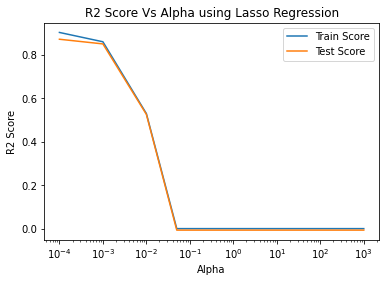

In [101]:
# plotting mean test and train scores with alpha 

# Converting the 'param_alpha' datatype from object to float
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# Plotting R2 Score of Train score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])

# Plotting R2 Score of Test score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])

plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score Vs Alpha using Lasso Regression")
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.xscale('log')
plt.show()

**<font color="green">Based on above data for Lasso Regression best Alpha Value is "0.0001" for processing.</font>**

This graph shows that alpha value might be less than "0.001". So lets fine tune the parameter.

In [102]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01]}

lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [103]:
# Printing the best hyperparameter alpha
print("Lasso Best param: ", lasso_model_cv.best_params_)
print("Lasso Best Score: ", lasso_model_cv.best_score_)
print("Lasso Best estimator: ", lasso_model_cv.best_estimator_)
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

Lasso Best param:  {'alpha': 0.0001}
Lasso Best Score:  0.8704468283891875
Lasso Best estimator:  Lasso(alpha=0.0001)


param_alpha  mean_train_score  mean_test_score  rank_test_score
0      0.0001              0.90             0.87                1
1       0.001              0.86             0.85                2
2        0.01              0.53             0.53                3

**Let's visualize above data.**

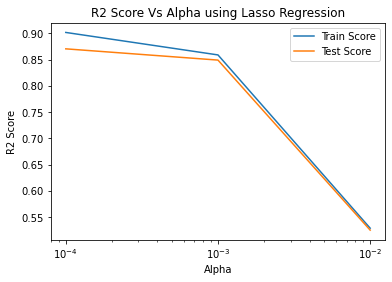

In [104]:
# plotting mean test and train scores with alpha 

# Converting the 'param_alpha' datatype from object to float
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# Plotting R2 Score of Train score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])

# Plotting R2 Score of Test score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])

plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score Vs Alpha using Lasso Regression")
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.xscale('log')
plt.show()

In [105]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_new, y_train)
print(lasso.coef_)

[-0.03919266 -0.03178286  0.06288222  0.19075237  0.07790289  0.0416315
  0.03085487  0.02348128 -0.          0.0302663   0.0194419   0.28554305
  0.04695854  0.0471883   0.01686508  0.04160391  0.02286235  0.02933779
  0.02203643  0.07851481 -0.02672642  0.07418536  0.08311256  0.0903262
  0.05965853 -0.          0.03710263  0.04536229 -0.02334041 -0.00686037
  0.03676562  0.04461388  0.03949218  0.03325343  0.02405693 -0.01721149
  0.         -0.01902217  0.02532654 -0.          0.         -0.
  0.00131218 -0.02761574 -0.02308314  0.01465786  0.01857627  0.02870551
  0.0114907   0.        ]


In [106]:
y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("****************Data after Lasso Regression********************")
metric3 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)
print("***************************************************************")

****************Data after Lasso Regression********************
Train R2 score:  0.898744803889722
Test R2 score:  0.8823113380554358
Train RSS score:  1.718972394189502
Test RSS score:  0.9009948668142017
Train MSE score:  0.001683616448765428
Test MSE score:  0.0020523801066382728
Train RMSE score:  0.04103189550539224
Test RMSE score:  0.045303201946863235
***************************************************************


**<font color="maroon">We have a good train score 89.87% and good test score as well 88.23%. That means what the model learnt in the train set it performed well in the test set.</font>**

In [107]:
#Top 10 feature of Lasso Regression

lasso_param_df = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient':lasso.coef_})
(lasso_param_df.sort_values('Coeficient', ascending=False)).head(10)

Features  Coeficient
11    GrLivArea        0.29
3   OverallQual        0.19
23  MSZoning_RL        0.09
22  MSZoning_RH        0.08
19   GarageCars        0.08
4   OverallCond        0.08
21  MSZoning_FV        0.07
2       LotArea        0.06
24  MSZoning_RM        0.06
13     FullBath        0.05

In [108]:
# Let's compare all metrics by creating a table which will contain all together

lr_table = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 
                        'RMSE (Train)','RMSE (Test)'], 
            'Linear Regression': metric1
           }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metrics', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metrics  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           9.03e-01          8.97e-01          8.99e-01
1   R2 Score (Test)           8.80e-01          8.77e-01          8.82e-01
2       RSS (Train)           1.64e+00          1.74e+00          1.72e+00
3        RSS (Test)           9.18e-01          9.44e-01          9.01e-01
4       MSE (Train)           1.61e-03          1.71e-03          1.68e-03
5        MSE (Test)           2.09e-03          2.15e-03          2.05e-03
6      RMSE (Train)           4.01e-02          4.13e-02          4.10e-02
7       RMSE (Test)           4.57e-02          4.64e-02          4.53e-02

## Lets observe the changes in the coefficients after regularization

In [109]:
betas = pd.DataFrame(index=X_train_new.columns)

In [110]:
betas.rows = X_train_new.columns

In [111]:
betas['Linear'] = housing_lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [112]:
pd.set_option('display.max_rows', None)
betas.head(50)

Linear     Ridge     Lasso
MSSubClass             -0.04 -3.62e-02 -3.92e-02
LotFrontage            -0.08 -2.67e-02 -3.18e-02
LotArea                 0.12  6.33e-02  6.29e-02
OverallQual             0.18  1.67e-01  1.91e-01
OverallCond             0.08  7.98e-02  7.79e-02
BsmtQual                0.05  4.37e-02  4.16e-02
BsmtExposure            0.03  3.24e-02  3.09e-02
BsmtFinType1            0.03  2.20e-02  2.35e-02
BsmtFinSF1             -0.03  6.09e-03 -0.00e+00
TotalBsmtSF             0.07  6.71e-02  3.03e-02
HeatingQC               0.02  2.10e-02  1.94e-02
GrLivArea               0.30  1.87e-01  2.86e-01
BsmtFullBath            0.05  4.62e-02  4.70e-02
FullBath                0.04  6.70e-02  4.72e-02
HalfBath                0.02  3.08e-02  1.69e-02
BedroomAbvGr            0.05  6.64e-02  4.16e-02
KitchenQual             0.02  3.15e-02  2.29e-02
FireplaceQu             0.03  3.50e-02  2.93e-02
GarageFinish            0.02  2.39e-02  2.20e-02
GarageCars              0.08  7.72e-02  7.85e-02
HouseAge               -0.02 -2.67e-02 -2.67e-02
MSZoning_FV             0.14  5.65e-02  7.42e-02
MSZoning_RH             0.15  6.89e-02  8.31e-02
MSZoning_RL             0.15  7.41e-02  9.03e-02
MSZoning_RM             0.12  4.79e-02  5.97e-02
LotConfig_FR3          -0.02 -1.39e-02 -0.00e+00
Neighborhood_ClearCr    0.04  4.15e-02  3.71e-02
Neighborhood_Crawfor    0.05  5.04e-02  4.54e-02
Neighborhood_Edwards   -0.02 -2.25e-02 -2.33e-02
Neighborhood_MeadowV   -0.03 -2.53e-02 -6.86e-03
Neighborhood_NoRidge    0.04  4.72e-02  3.68e-02
Neighborhood_NridgHt    0.05  4.72e-02  4.46e-02
Neighborhood_Somerst    0.04  4.12e-02  3.95e-02
Neighborhood_StoneBr    0.04  3.94e-02  3.33e-02
Neighborhood_Veenker    0.03  2.81e-02  2.41e-02
BldgType_Twnhs         -0.02 -2.12e-02 -1.72e-02
Exterior1st_AsphShn     0.03  1.04e-02  0.00e+00
Exterior1st_BrkComm    -0.08 -3.43e-02 -1.90e-02
Exterior1st_BrkFace     0.02  2.58e-02  2.53e-02
Exterior1st_CBlock     -0.02 -9.23e-03 -0.00e+00
Exterior1st_CemntBd    -0.03 -7.63e-03  0.00e+00
Exterior2nd_CBlock     -0.02 -9.23e-03 -0.00e+00
Exterior2nd_CmentBd     0.03  1.49e-02  1.31e-03
Exterior2nd_Stucco     -0.03 -2.46e-02 -2.76e-02
Exterior2nd_Wd Shng    -0.03 -2.43e-02 -2.31e-02
Foundation_CBlock       0.02  1.58e-02  1.47e-02
Foundation_PConc        0.03  1.95e-02  1.86e-02
Foundation_Slab         0.05  3.83e-02  2.87e-02
Foundation_Stone        0.05  3.14e-02  1.15e-02
Foundation_Wood         0.05  2.38e-02  0.00e+00

## Step 5: Residual analysis on Train and Test Data Set

To validate assumptions of the model, and hence the reliability for inference. We are are considering **Model generatd using Lasso Regression** as final predictive model where Alpha value is "0.0001"

#### Step 5.1 Normal Distribution of the error terms
We need to check if the error terms are also normally distributed i.e. around 0 or not (which is infact, one of the major assumptions of linear regression), let us plot the distplot of the error terms and see what it looks like.

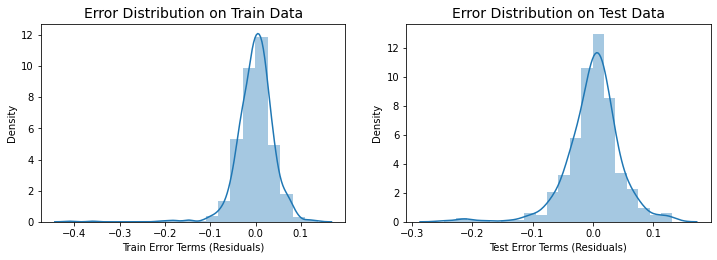

In [113]:
plt.figure(figsize=(12,8))

#Train Data Plot
plt.subplot(2,2,1)
residual_train = y_train - y_train_pred
sns.distplot(residual_train, bins=20)
plt.title("Error Distribution on Train Data", fontdict={'fontsize': 14})
plt.xlabel("Train Error Terms (Residuals)")

#Test Data Plot
plt.subplot(2,2,2)
residual_test = y_test - y_test_pred
sns.distplot(residual_test, bins=20)
plt.title("Error Distribution on Test Data", fontdict={'fontsize': 14})
plt.xlabel("Test Error Terms (Residuals)")

plt.show()

#### Step 5.2 Error terms are independent

In [114]:
plt.figure(figsize=(14,10))
#Train Data
plt.subplot(2,2,1)
sns.regplot(x=y_train_pred,y=residual_train, line_kws={"color": "red"})
plt.title("Residual Vs Predictive Values for Train Data", fontdict={'fontsize':12})
plt.xlabel("Train Predictive Values")
plt.ylabel("Train Residual")

#Test Data
plt.subplot(2,2,2)
sns.regplot(x=y_test_pred,y=residual_test, line_kws={"color": "red"})
plt.title("Residual Vs Predictive Values for Test Data", fontdict={'fontsize':12})
plt.xlabel("Test Predictive Values")
plt.ylabel("Test Residual")
plt.show()

`From above graph we can see that there is no relation and specific pattern between residual and predicted values which is good sign for model`

#### Step 5.3 Shows Linear Relationship between Actual and Predicted for Train and Test Values

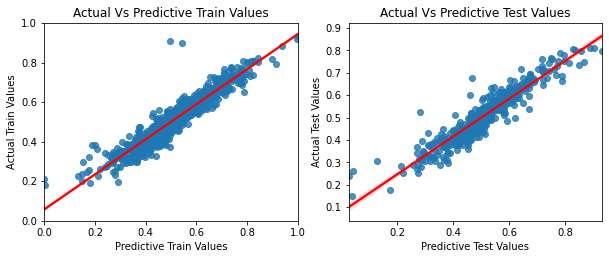

In [115]:
plt.figure(figsize=(10,8))

#Train Data
plt.subplot(2,2,1)
sns.regplot(x=y_train,y=y_train_pred, line_kws={"color": "red"})
plt.title("Actual Vs Predictive Train Values", fontdict={'fontsize':12})
plt.xlabel("Predictive Train Values")
plt.ylabel("Actual Train Values")

#Test Data
plt.subplot(2,2,2)
sns.regplot(x=y_test,y=y_test_pred, line_kws={"color": "red"})
plt.title("Actual Vs Predictive Test Values", fontdict={'fontsize':12})
plt.xlabel("Predictive Test Values")
plt.ylabel("Actual Test Values")

plt.show()

## <font color="green">Conclusion:</font>

- The residual analysis for both test and train data seem to fit the assumptions of the Linear Regression.
- Residuals have mean of zero and closely normally distributed.
- Residuals do not have any pattern hence it has homoscedasticity.

**<font color=maroon>1) Which variables are significant in predicting the price of a house</font>**

**Answer:** Below are the TOP 10 variables which are significant in predicting the Sale Price.

- **GrLivArea:** Above grade (ground) living area square feet.
- **OverallQual:** Rates the overall material and finish of the house.
- **MSZoning_RL:** Identifies residential with Low Density zone. 
- **MSZoning_RH:** Identifies residential with High Density zone. 
- **OverallCond:** Rates the overall condition of the house.
- **GarageCars:** Size of garage in car capacity.
- **LotArea:** Lot size in square feet
- **BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)
- **MSZoning_RM:** Identifies residential with Medium Density zone.
- **FullBath:** Full bathrooms above grade

**<font color=maroon>2) How well those variables describe the price of a house.</font>**

**Answer:** Above variables plays a vital as they provides good train and test scores by using Ridge and Lasso Regression, shown below which means what the model learnt in the train set it performed well in the test set.

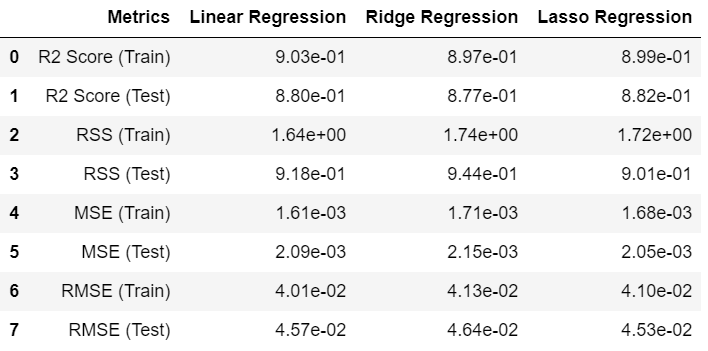


Outcome of above table

**Ridge Regression**
   - R2 score(Train): 89.7%
   - R2 score(Test): 87.7%
        
**Lasso Regression**
   - R2 score(Train): 89.9%
   - R2 score(Test): 88.2%

**<font color=maroon>3) What is the optimal value of alpha for ridge and lasso regression</font>**

**Answer:** Optimal value of alpha for Ridge and Lasso Regression is below:

- **Alpha value for Ridge Regression:** <font color="blue">2</font>
        
- **Alpha value for Lasso Regression:** <font color="blue">0.0001</font>


===================================================================================================================
 # <font color=blue>Problem Statement - Part II of the Assignment</font>

===================================================================================================================


**<font color=maroon>Question 1) What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?</font>**

**Answer 1:** 

Optimal value of alpha for Ridge and Lasso Regression is below:

- **Alpha value for Ridge Regression:** <font color="blue">2</font>
        
- **Alpha value for Lasso Regression:** <font color="blue">0.0001</font>

### <font color=green>Increasing Alpha value of Ridge Regression from 2 to 4</font>

In [116]:
#Fitting Ridge model for alpha = 4 and printing coefficients which have been penalised
alpha_4 = 4
ridge_4 = Ridge(alpha=alpha_4)

ridge_4.fit(X_train_new, y_train)

Ridge(alpha=4)

In [117]:
y_train_pred = ridge_4.predict(X_train_new)
y_test_pred = ridge_4.predict(X_test_new)

print("****************Data after Ridge Regression Alpha Value = 4********************")
metric4 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)
print("***************************************************************")

****************Data after Ridge Regression Alpha Value = 4********************
Train R2 score:  0.8918465964512801
Test R2 score:  0.8711235502766299
Train RSS score:  1.8360807363940839
Test RSS score:  0.9866457629426572
Train MSE score:  0.0017983160983291713
Test MSE score:  0.0022474846536279206
Train RMSE score:  0.042406557256268414
Test RMSE score:  0.04740764340934825
***************************************************************


**<font color="maroon">Train R2 score reduces little bit from 89.74%  to 89.18% and Test R2 score also reduce from 87.67% to 87.11%.</font>**

In [118]:
#Top 10 feature of Ridge Regression

ridge_param_df_4 = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient_4':ridge_4.coef_})
(ridge_param_df_4.sort_values('Coeficient_4', ascending=False)).head(10)

Features  Coeficient_4
3            OverallQual          0.15
11             GrLivArea          0.15
19            GarageCars          0.08
13              FullBath          0.07
4            OverallCond          0.07
15          BedroomAbvGr          0.07
9            TotalBsmtSF          0.06
23           MSZoning_RL          0.05
30  Neighborhood_NoRidge          0.05
27  Neighborhood_Crawfor          0.05

=======================================================================================================================

### <font color=green>Increasing Alpha value of Lasso Regression from 0.0001 to 0.0002</font>

In [119]:
#Fitting lasso model for alpha = 0.0002 and printing coefficients which have been penalised
alpha_0002 = 0.0002
lasso_0002 = Lasso(alpha=alpha_0002)

lasso_0002.fit(X_train_new, y_train)

Lasso(alpha=0.0002)

In [120]:
y_train_pred = lasso_0002.predict(X_train_new)
y_test_pred = lasso_0002.predict(X_test_new)

print("****************Data after Lasso Regression with Value = 0.0002********************")
metric5 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)
print("***************************************************************")

****************Data after Lasso Regression with Value = 0.0002********************
Train R2 score:  0.8904249243822818
Test R2 score:  0.8764481675946416
Train RSS score:  1.860215942626232
Test RSS score:  0.9458818287453397
Train MSE score:  0.0018219548899375436
Test MSE score:  0.002154628311492801
Train RMSE score:  0.04268436352972296
Test RMSE score:  0.04641797401322898
***************************************************************


**<font color="maroon">Train R2 score reduces little bit from 89.87%  to 89.04% and Test R2 score also reduces from 88.23% to 87.64%.</font>**

In [121]:
#Top 10 feature of Lasso Regression

lasso_param_df_0002 = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient_0002':lasso_0002.coef_})
(lasso_param_df_0002.sort_values('Coeficient_0002', ascending=False)).head(10)

Features  Coeficient_0002
11             GrLivArea             0.28
3            OverallQual             0.20
19            GarageCars             0.08
4            OverallCond             0.07
13              FullBath             0.05
12          BsmtFullBath             0.05
27  Neighborhood_Crawfor             0.04
31  Neighborhood_NridgHt             0.04
32  Neighborhood_Somerst             0.04
26  Neighborhood_ClearCr             0.04

In [122]:
# Let's compare all metrics by creating a table which will contain all together after doubling it Alpha Values

mt_table_2 = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 
                          'RMSE (Train)','RMSE (Test)'], 
              'Ridge Regression_2': metric2, 
              'Lasso Regression_0.0001': metric3, 
              'Ridge Regression_4': metric4, 
              'Lasso Regression_0.0002': metric5, 
            }

final_metric_2 = pd.DataFrame(mt_table_2 ,columns = ['Metrics', 'Ridge Regression_2', 'Lasso Regression_0.0001', 'Ridge Regression_4', 'Lasso Regression_0.0002'] )

final_metric_2

Metrics  Ridge Regression_2  Lasso Regression_0.0001  \
0  R2 Score (Train)            8.97e-01                 8.99e-01   
1   R2 Score (Test)            8.77e-01                 8.82e-01   
2       RSS (Train)            1.74e+00                 1.72e+00   
3        RSS (Test)            9.44e-01                 9.01e-01   
4       MSE (Train)            1.71e-03                 1.68e-03   
5        MSE (Test)            2.15e-03                 2.05e-03   
6      RMSE (Train)            4.13e-02                 4.10e-02   
7       RMSE (Test)            4.64e-02                 4.53e-02   

   Ridge Regression_4  Lasso Regression_0.0002  
0            8.92e-01                 8.90e-01  
1            8.71e-01                 8.76e-01  
2            1.84e+00                 1.86e+00  
3            9.87e-01                 9.46e-01  
4            1.80e-03                 1.82e-03  
5            2.25e-03                 2.15e-03  
6            4.24e-02                 4.27e-02  
7            4.74e-02                 4.64e-02

`After doubling the Alpha Values for Ridge and Lasso, both Train and Test R2 score reduces slightly.`

## Lets observe the changes in the coefficients after regularization

In [123]:
betas_2 = pd.DataFrame(index=X_train_new.columns)

In [124]:
betas_2.rows = X_train_new.columns

In [125]:
betas_2['Ridge_4'] = ridge_4.coef_
betas_2['Lasso_0002'] = lasso_0002.coef_

In [126]:
pd.set_option('display.max_rows', None)
betas_2.head(50)

Ridge_4  Lasso_0002
MSSubClass           -3.29e-02   -3.50e-02
LotFrontage          -8.39e-03   -0.00e+00
LotArea               4.66e-02    1.45e-02
OverallQual           1.52e-01    2.01e-01
OverallCond           7.27e-02    7.34e-02
BsmtQual              4.19e-02    3.33e-02
BsmtExposure          3.33e-02    3.07e-02
BsmtFinType1          2.13e-02    2.39e-02
BsmtFinSF1            1.50e-02    0.00e+00
TotalBsmtSF           6.00e-02    9.20e-03
HeatingQC             2.10e-02    1.75e-02
GrLivArea             1.51e-01    2.81e-01
BsmtFullBath          4.27e-02    4.79e-02
FullBath              7.30e-02    4.88e-02
HalfBath              3.41e-02    1.46e-02
BedroomAbvGr          6.54e-02    3.18e-02
KitchenQual           3.72e-02    2.42e-02
FireplaceQu           3.90e-02    3.07e-02
GarageFinish          2.53e-02    2.25e-02
GarageCars            7.64e-02    7.96e-02
HouseAge             -2.89e-02   -2.84e-02
MSZoning_FV           3.63e-02    1.36e-02
MSZoning_RH           4.62e-02    1.90e-02
MSZoning_RL           5.39e-02    3.47e-02
MSZoning_RM           2.66e-02    0.00e+00
LotConfig_FR3        -9.94e-03   -0.00e+00
Neighborhood_ClearCr  3.91e-02    3.51e-02
Neighborhood_Crawfor  4.80e-02    3.97e-02
Neighborhood_Edwards -2.33e-02   -2.30e-02
Neighborhood_MeadowV -2.47e-02   -0.00e+00
Neighborhood_NoRidge  4.85e-02    3.23e-02
Neighborhood_NridgHt  4.46e-02    3.85e-02
Neighborhood_Somerst  3.79e-02    3.76e-02
Neighborhood_StoneBr  3.49e-02    2.13e-02
Neighborhood_Veenker  2.45e-02    1.53e-02
BldgType_Twnhs       -2.04e-02   -1.24e-02
Exterior1st_AsphShn   6.25e-03    0.00e+00
Exterior1st_BrkComm  -2.24e-02   -0.00e+00
Exterior1st_BrkFace   2.56e-02    2.55e-02
Exterior1st_CBlock   -6.51e-03   -0.00e+00
Exterior1st_CemntBd  -2.68e-03    0.00e+00
Exterior2nd_CBlock   -6.51e-03   -0.00e+00
Exterior2nd_CmentBd   1.12e-02    0.00e+00
Exterior2nd_Stucco   -2.01e-02   -2.23e-02
Exterior2nd_Wd Shng  -2.26e-02   -1.98e-02
Foundation_CBlock     1.26e-02    9.61e-03
Foundation_PConc      1.74e-02    1.48e-02
Foundation_Slab       2.93e-02    9.53e-03
Foundation_Stone      2.23e-02    0.00e+00
Foundation_Wood       1.58e-02    0.00e+00

**Below are the TOP 10 variables which are significant in predicting the Sale Price after doubling ALPHA values.**

- **GrLivArea:** Above grade (ground) living area square feet.
- **OverallQual:** Rates the overall material and finish of the house.
- **GarageCars:** Size of garage in car capacity.
- **OverallCond:** Rates the overall condition of the house.
- **FullBath:** Full bathrooms above grade
- **BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)
- **MSZoning_RL:** Identifies residential with Low Density zone. 
- **TotalBsmtSF:** Total square feet of basement area
- **BsmtFullBath:** Basement full bathrooms
- **Neighborhood_Crawfor:** Physical locations within Ames city limits is Crawford.

============================================================================================================

**<font color=maroon>Question 2) You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?</font>**

**Answer 2:** 

R2 Score of Lasso is better than Ridge for Test Data, so we will prefer to go for Lasso regression.



============================================================================================================

**<font color=maroon>Question 3) After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?</font>**

**Answer 3:** 

Below are the TOP 5 variables which are significant in predicting the Sale Price.

- GrLivArea: Above grade (ground) living area square feet.
- OverallQual: Rates the overall material and finish of the house.
- GarageCars: Size of garage in car capacity.
- OverallCond: Rates the overall condition of the house.
- FullBath: Full bathrooms above grade

So let's remove those and again build model using Lasso Regression.

In [127]:
#Prepare Top 5 column list to remove
remove_top5_col = ['GrLivArea', 'OverallQual', 'GarageCars', 'OverallCond', 'FullBath']

In [128]:
#Display the previous list of columns
print("************Train Data Columns**************")
print(X_train_new.columns)
print("\n************Test Data Columns**************")
print(X_test_new.columns)

print("\nShape of Train Data Set: ", X_train_new.shape)
print("\nShape of Test Data Set: ", X_test_new.shape)

************Train Data Columns**************
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF',
       'HeatingQC', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'HouseAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'BldgType_Twnhs',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation

In [129]:
#Let's drop "remove_top5_col" from X_train_new.columns and X_test_new.columns
X_train_new_2 = X_train_new.drop(remove_top5_col, axis=1)
X_test_new_2 = X_test_new.drop(remove_top5_col, axis=1)

print("\nShape of Train Data Set after removing columns: ", X_train_new_2.shape)
print("\nShape of Test Data Set after removing columns: ", X_test_new_2.shape)


Shape of Train Data Set after removing columns:  (1021, 45)

Shape of Test Data Set after removing columns:  (439, 45)


### <font color=green>Lasso Regression After Removing Top 5 Variables:</font>

In [130]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised
alpha_subj = 0.0001
lasso_subj = Lasso(alpha=alpha_subj)

lasso_subj.fit(X_train_new_2, y_train)

Lasso(alpha=0.0001)

In [131]:
y_train_pred = lasso_subj.predict(X_train_new_2)
y_test_pred = lasso_subj.predict(X_test_new_2)

print("****************Data after Lasso Regression with Value = 0.0001 after removal top 5 variables********************")
metric6 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)
print("***************************************************************")

****************Data after Lasso Regression with Value = 0.0001 after removal top 5 variables********************
Train R2 score:  0.8409328271411474
Test R2 score:  0.8024966594896752
Train RSS score:  2.700425158115736
Test RSS score:  1.5120360197678266
Train MSE score:  0.002644882623032063
Test MSE score:  0.00344427339354858
Train RMSE score:  0.0514284223268813
Test RMSE score:  0.05868793226506264
***************************************************************


**<font color="maroon">Train R2 score reduces drastically bit from 89.87%  to 84.09% and Test R2 score also reduces from 88.23% to 80.24% after removal of Top 5 predictive variables.</font>**

In [132]:
#Top 10 feature of Lasso Regression

lasso_param_df_subj = pd.DataFrame({'Features':X_train_new_2.columns, 'Coeficient_subj':lasso_subj.coef_})
(lasso_param_df_subj.sort_values('Coeficient_subj', ascending=False)).head(10)

Features  Coeficient_subj
7            TotalBsmtSF             0.25
11          BedroomAbvGr             0.20
2                LotArea             0.15
18           MSZoning_RL             0.11
16           MSZoning_FV             0.10
17           MSZoning_RH             0.10
19           MSZoning_RM             0.08
12           KitchenQual             0.08
25  Neighborhood_NoRidge             0.08
42       Foundation_Slab             0.07

In [133]:
# Let's compare all metrics by creating a table which will contain all together after doubling it Alpha Values

mt_table_3 = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 
                          'RMSE (Train)','RMSE (Test)'], 
              'Lasso Regression_0.0001': metric3, 
              'Lasso Regression_subj_0.0001': metric6, 
             }

final_metric_3 = pd.DataFrame(mt_table_3 ,columns = ['Metrics', 'Lasso Regression_0.0001', 'Lasso Regression_subj_0.0001'] )

final_metric_3

Metrics  Lasso Regression_0.0001  Lasso Regression_subj_0.0001
0  R2 Score (Train)                 8.99e-01                      8.41e-01
1   R2 Score (Test)                 8.82e-01                      8.02e-01
2       RSS (Train)                 1.72e+00                      2.70e+00
3        RSS (Test)                 9.01e-01                      1.51e+00
4       MSE (Train)                 1.68e-03                      2.64e-03
5        MSE (Test)                 2.05e-03                      3.44e-03
6      RMSE (Train)                 4.10e-02                      5.14e-02
7       RMSE (Test)                 4.53e-02                      5.87e-02

`After removing Top 5 predictive variables values, both Train and Test R2 score drastically decreases in Lasso Regression.`

**Below are the TOP 5 variables which are significant in predicting the Sale Price after removing 5 predictive variables from previous model..**

- **TotalBsmtSF:** Total square feet of basement area
- **BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)
- **LotArea:** Lot size in square feet
- **MSZoning_RL:** Identifies residential with Low Density zone. 
- **MSZoning_RH:** Identifies residential with High Density zone.

==============================================================================================================

**<font color=maroon>Question 4) How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?</font>**

**Answer 4:** 

- Robust refers the model works for a broad range of inputs. If the model gets really good results at training time (it seems “more accurate”) but won’t generalize to out-of-sample data (i.e. it isn’t robust) then we call it overfitting. 

- The model should be generalized so that the test accuracy is not lesser than the training score.

- Here in our case, based on all data and modelling both Ridge and Lasso performed good on Train and Test Data which shows our model with Alpah value "2" for Ridge and "0.0001" for Lasso is Robust and more Generalized model.

    - Simpler models are more generic
    - Simpler model requires fewer training samples
    - Simpler model are more robust

- Too much importance should not given to the outliers so that the accuracy predicted by the model is high. But outliers analysis needs to be done and only those which are relevant to the dataset need to be retained and rest should be dropped.

`If the accuracy of the Train and Test are same then that means model is overfitted and it learnt all the Train and Test data and model is not robust and generalized. So, it will drastically be failed and will not work on broad range of unseen data.`

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# <font color=green>End of Surprise Housing - Advance Regression Assignment</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**